# Part I - PISA Data Exploration
## by Alham Hotaki

## Introduction
> PISA is a survey that examines students from compulsory education on how well prepared they are for life after school. This investigation focuses on the PISA Survey from 2012, with data belonging to around 500K students from 65 different countries.



## Preliminary Wrangling


In [178]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from scipy import stats
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [183]:
# failed to read file as utf-8. changed to ISO-8859-1 instead.
df_pisa=pd.read_csv('pisa2012.csv', encoding = "ISO-8859-1")

C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3194: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


In [4]:
df_pisa.shape

(485490, 636)

In [6]:
df_pisa_dict=pd.read_csv('pisadict2012.csv', encoding = "ISO-8859-1")

In [7]:
pd.options.display.max_rows = len(df_pisa)
pd.options.display.max_columns = len(df_pisa.columns)

In [173]:
print(df_pisa_dict).head()

      Unnamed: 0                                                  x
0            CNT                           Country code 3-character
1       SUBNATIO  Adjudicated sub-region code 7-digit code (3-di...
2        STRATUM  Stratum ID 7-character (cnt + region ID + orig...
3           OECD                                       OECD country
4             NC                       National Centre 6-digit Code
5       SCHOOLID  School ID 7-digit (region ID + stratum ID + 3-...
6        STIDSTD                                         Student ID
7        ST01Q01                                International Grade
8        ST02Q01                           National Study Programme
9        ST03Q01                                      Birth - Month
10       ST03Q02                                        Birth -Year
11       ST04Q01                                             Gender
12       ST05Q01                                   Attend <ISCED 0>
13       ST06Q01                                

AttributeError: 'NoneType' object has no attribute 'head'

In [174]:
df_pisa.ENTUSE.value_counts().head()                

-0.0018    14701
 0.0883    13451
-0.1819    13111
-0.0919    13095
 0.1788    12810
Name: ENTUSE, dtype: int64

In [10]:
df_pisa.ST04Q01.value_counts()

Female    245064
Male      240426
Name: ST04Q01, dtype: int64

In [11]:
df_pisa['AGE'].value_counts()

15.58    42762
15.67    42353
15.75    41664
15.83    41402
15.92    41084
16.00    41049
15.42    40437
15.50    40291
16.08    39313
16.17    38356
15.33    28354
16.25    26139
15.25    11986
16.33    10183
15.17        1
Name: AGE, dtype: int64

In [175]:
df_pisa['CNT'].value_counts().head()

Mexico    33806
Italy     31073
Spain     25313
Canada    21544
Brazil    19204
Name: CNT, dtype: int64

In [13]:
df_pisa['CNT'].nunique()

68

In [14]:
pd.options.display.max_rows = len(df_pisa)
pd.options.display.max_columns = len(df_pisa.columns)
df_pisa.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,ST88Q03,ST88Q04,ST89Q02,ST89Q03,ST89Q04,ST89Q05,ST91Q01,ST91Q02,ST91Q03,ST91Q04,ST91Q05,ST91Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST94Q05,ST94Q06,ST94Q09,ST94Q10,ST94Q14,ST96Q01,ST96Q02,ST96Q03,ST96Q05,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,IC11Q01,IC11Q02,IC11Q03,IC11Q04,IC11Q05,IC11Q06,IC11Q07,IC22Q01,IC22Q02,IC22Q04,IC22Q06,IC22Q07,IC22Q08,EC01Q01,EC02Q01,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,EC05Q01,EC06Q01,EC07Q01,EC07Q02,EC07Q03,EC07Q04,EC07Q05,EC08Q01,EC08Q02,EC08Q03,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUD

In [184]:
df_pisa.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 636 columns):
 #    Column       Non-Null Count   Dtype  
---   ------       --------------   -----  
 0    Unnamed: 0   485490 non-null  int64  
 1    CNT          485490 non-null  object 
 2    SUBNATIO     485490 non-null  int64  
 3    STRATUM      485490 non-null  object 
 4    OECD         485490 non-null  object 
 5    NC           485490 non-null  object 
 6    SCHOOLID     485490 non-null  int64  
 7    STIDSTD      485490 non-null  int64  
 8    ST01Q01      485490 non-null  int64  
 9    ST02Q01      485438 non-null  float64
 10   ST03Q01      485490 non-null  int64  
 11   ST03Q02      485490 non-null  int64  
 12   ST04Q01      485490 non-null  object 
 13   ST05Q01      476166 non-null  object 
 14   ST06Q01      457994 non-null  float64
 15   ST07Q01      436690 non-null  object 
 16   ST07Q02      431278 non-null  object 
 17   ST07Q03      305687 non-null  object 
 18   ST

### Structure of the dataset:

> The file provided for this study, pisa2012.csv, contains data from a total of 485'490 students grouped in 636 columns.
The dataset contains not only the results from the exam in each category, but also lots of information on the students' background, including variables like country of residence, number of family members and their level of education, possessions or access to different facilities at home and school.

### Main feature(s) of interest in this dataset:

> The main feature of this dataset is the score obtained by the students in each discipline and the potential for understanding how a number of different factors can impact these scores and therefore the level of preparation for students around the world.
For the simplification purpose, it was supposed that the impact of the following factors shall be assessed on the performance of students in three (math, science and reading) areas in different countries:
    
    1. Gender (ST04Q01)
    2. Family Structure (FAMSTRUC)
    3. Immigration status (IMMIG)
    4. Education level of Father (FISCED)
    5. Eduction level of Mother (MISCED)
    6. Household Possessions (HOMEPOS, WEALTH, CULTPOS, HEDRES)
    7. Use of ICT at home (ICTHOME)
    8. Use of ICT for entertainment (ENTUSE)

### Supporting features

> The focus will be mainly on the performance of students in three subjects: Math, Science, Reading. For the simplification, a new column will be created and mean of all five categories under each subject will be considered. 

## Data wrangling

> In order to focus on the areas of interest in our dataset and make it more readable for the users, the following steps are taken to find the relevant responses from the main dataset

In [16]:
#we need only the relevant columns as listed above, the remaining ones are not required for the current assessment:
cols=['CNT','STIDSTD','AGE','ST04Q01', 'FAMSTRUC', 'IMMIG', 'FISCED', 'MISCED', 'HOMEPOS', 'WEALTH', 'CULTPOS', 'HEDRES', 'ICTHOME', 'ENTUSE',
      'PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH',
      'PV1READ','PV2READ','PV3READ','PV4READ','PV5READ',
      'PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']
df_pisa_clean = pd.read_csv('pisa2012.csv', usecols=cols, encoding = "ISO-8859-1")

In [17]:
df_pisa_clean.head()

,CNT,STIDSTD,ST04Q01,AGE,CULTPOS,ENTUSE,FAMSTRUC,FISCED,HEDRES,HOMEPOS,ICTHOME,IMMIG,MISCED,WEALTH,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
0,Albania,1,Female,16.17,-0.48,NaN,2.0,"ISCED 3A, ISCED 4",-1.29,-2.61,NaN,Native,"ISCED 3A, ISCED 4",-2.92,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877
1,Albania,2,Female,16.17,1.27,NaN,2.0,"ISCED 3A, ISCED 4",1.12,1.41,NaN,Native,"ISCED 5A, 6",0.69,486.1427,464.3325,453.4273,472.9008,476.0165,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116
2,Albania,3,Female,15.58,1.27,NaN,2.0,"ISCED 5A, 6",-0.69,0.14,NaN,Native,"ISCED 5A, 6",-0.23,533.2684,481.0796,489.6479,490.4269,533.2684,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643
3,Albania,4,Female,15.67,1.27,NaN,2.0,"ISCED 5A, 6",0.04,-0.73,NaN,Native,"ISCED 3B, C",-1.17,412.2215,498.6836,415.3373,466.7472,454.2842,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573
4,Albania,5,Female,15.50,1.27,NaN,2.0,"ISCED 3A, ISCED 4",-0.69,-0.57,NaN,Native,None,-1.17,381.9209,328.1742,403.7311,418.5309,395.1628,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746


In [18]:
df_pisa_clean.to_csv('pisa_clean.csv')

In [19]:
df_pisa_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 29 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   CNT       485490 non-null  object 
 1   STIDSTD   485490 non-null  int64  
 2   ST04Q01   485490 non-null  object 
 3   AGE       485374 non-null  float64
 4   CULTPOS   471357 non-null  float64
 5   ENTUSE    295195 non-null  float64
 6   FAMSTRUC  429058 non-null  float64
 7   FISCED    452903 non-null  object 
 8   HEDRES    477772 non-null  float64
 9   HOMEPOS   479807 non-null  float64
 10  ICTHOME   298740 non-null  float64
 11  IMMIG     471793 non-null  object 
 12  MISCED    467085 non-null  object 
 13  WEALTH    479597 non-null  float64
 14  PV1MATH   485490 non-null  float64
 15  PV2MATH   485490 non-null  float64
 16  PV3MATH   485490 non-null  float64
 17  PV4MATH   485490 non-null  float64
 18  PV5MATH   485490 non-null  float64
 19  PV1READ   485490 non-null  float64
 20  PV2R

In [20]:
df_pisa_clean.describe()

,STIDSTD,AGE,CULTPOS,ENTUSE,FAMSTRUC,HEDRES,HOMEPOS,ICTHOME,WEALTH,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
count,485490.000000,485374.000000,471357.000000,295195.000000,429058.000000,477772.000000,479807.000000,298740.000000,479597.00000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.00000,485490.000000
mean,6134.066201,15.784283,-0.041828,-0.071999,1.889355,-0.195442,-0.324815,-0.100623,-0.33701,469.621653,469.648358,469.648930,469.641832,469.695396,472.004640,472.068052,472.022059,471.926562,472.013506,475.769824,475.813674,475.851549,475.78524,475.820184
std,6733.144944,0.290221,1.001965,1.054459,0.385621,1.074053,1.163213,1.076591,1.21530,103.265391,103.382077,103.407631,103.392286,103.419170,102.505523,102.626198,102.640489,102.576066,102.659989,101.464426,101.514649,101.495072,101.51220,101.566347
min,1.000000,15.170000,-1.510000,-3.974900,1.000000,-3.930000,-6.880000,-4.017800,-6.65000,19.792800,6.473000,42.226200,24.622200,37.085200,0.083400,0.703500,0.703500,4.134400,2.307400,2.648300,2.834800,11.879900,8.42970,17.754600
25%,1811.000000,15.580000,-0.480000,-0.547900,2.000000,-0.690000,-0.980000,-0.689100,-1.04000,395.318600,395.318600,395.240700,395.396500,395.240700,403.600700,403.360100,403.360100,403.354600,403.360100,404.457300,404.457300,404.550500,404.45730,404.457300
50%,3740.000000,15.750000,0.250000,-0.001800,2.000000,0.040000,-0.260000,-0.087200,-0.30000,466.201900,466.124000,466.201900,466.279800,466.435600,475.455000,475.535200,475.455000,475.535200,475.535200,475.699400,475.606100,475.699400,475.97910,475.885900
75%,7456.000000,16.000000,1.270000,0.454600,2.000000,1.120000,0.390000,0.416000,0.43000,541.057800,541.447300,541.291500,541.447300,541.447300,544.502500,544.503500,544.503500,544.502500,544.503500,547.780700,547.873900,547.967200,547.78070,547.780700
max,33806.000000,16.330000,1.270000,4.431900,3.000000,1.120000,4.150000,2.783300,3.25000,962.229300,957.010400,935.745400,943.456900,907.625800,904.802600,881.239200,884.447000,881.159000,901.608600,903.338300,900.540800,867.624000,926.55730,880.958600


In [21]:
#filling missing values:
age_mean = df_pisa_clean.AGE.mean()
df_pisa_clean['AGE'].fillna(age_mean, inplace=True)

In [22]:
df_pisa_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 29 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   CNT       485490 non-null  object 
 1   STIDSTD   485490 non-null  int64  
 2   ST04Q01   485490 non-null  object 
 3   AGE       485490 non-null  float64
 4   CULTPOS   471357 non-null  float64
 5   ENTUSE    295195 non-null  float64
 6   FAMSTRUC  429058 non-null  float64
 7   FISCED    452903 non-null  object 
 8   HEDRES    477772 non-null  float64
 9   HOMEPOS   479807 non-null  float64
 10  ICTHOME   298740 non-null  float64
 11  IMMIG     471793 non-null  object 
 12  MISCED    467085 non-null  object 
 13  WEALTH    479597 non-null  float64
 14  PV1MATH   485490 non-null  float64
 15  PV2MATH   485490 non-null  float64
 16  PV3MATH   485490 non-null  float64
 17  PV4MATH   485490 non-null  float64
 18  PV5MATH   485490 non-null  float64
 19  PV1READ   485490 non-null  float64
 20  PV2R

In [23]:
# calculate mean value for math, reading, science
# add a new column for total of means
df_pisa_clean['MATH']=(df_pisa_clean['PV1MATH']+df_pisa_clean['PV2MATH']+df_pisa_clean['PV3MATH']+df_pisa_clean['PV4MATH']+df_pisa_clean['PV5MATH'])/5
df_pisa_clean['READING']=(df_pisa_clean['PV1READ']+df_pisa_clean['PV2READ']+df_pisa_clean['PV3READ']+df_pisa_clean['PV4READ']+df_pisa_clean['PV5READ'])/5
df_pisa_clean['SCIENCE']=(df_pisa_clean['PV1SCIE']+df_pisa_clean['PV2SCIE']+df_pisa_clean['PV3SCIE']+df_pisa_clean['PV4SCIE']+df_pisa_clean['PV5SCIE'])/5
df_pisa_clean['TOTAL']=(df_pisa_clean['MATH']+df_pisa_clean['READING']+df_pisa_clean['SCIENCE'])/3

In [24]:
df_pisa_clean.head()

,CNT,STIDSTD,ST04Q01,AGE,CULTPOS,ENTUSE,FAMSTRUC,FISCED,HEDRES,HOMEPOS,ICTHOME,IMMIG,MISCED,WEALTH,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,MATH,READING,SCIENCE,TOTAL
0,Albania,1,Female,16.17,-0.48,NaN,2.0,"ISCED 3A, ISCED 4",-1.29,-2.61,NaN,Native,"ISCED 3A, ISCED 4",-2.92,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,366.18634,261.01424,371.91348,333.038020
1,Albania,2,Female,16.17,1.27,NaN,2.0,"ISCED 3A, ISCED 4",1.12,1.41,NaN,Native,"ISCED 5A, 6",0.69,486.1427,464.3325,453.4273,472.9008,476.0165,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,470.56396,384.68832,478.12382,444.458700
2,Albania,3,Female,15.58,1.27,NaN,2.0,"ISCED 5A, 6",-0.69,0.14,NaN,Native,"ISCED 5A, 6",-0.23,533.2684,481.0796,489.6479,490.4269,533.2684,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,505.53824,405.18154,486.60946,465.776413
3,Albania,4,Female,15.67,1.27,NaN,2.0,"ISCED 5A, 6",0.04,-0.73,NaN,Native,"ISCED 3B, C",-1.17,412.2215,498.6836,415.3373,466.7472,454.2842,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573,449.45476,477.46376,453.97240,460.296973
4,Albania,5,Female,15.50,1.27,NaN,2.0,"ISCED 3A, ISCED 4",-0.69,-0.57,NaN,Native,None,-1.17,381.9209,328.1742,403.7311,418.5309,395.1628,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746,385.50398,256.01010,367.15778,336.223953


In [25]:
# since we used the average value for each of Math, reading and science, no need to keep the old columns.
df_pisa_clean.drop(columns=['PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH',
                           'PV1READ','PV2READ','PV3READ','PV4READ','PV5READ',
                           'PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE'],inplace=True)

In [26]:
# in order to increas the readability of the dataset, some column names to be revised as follows:
df_pisa_clean.rename(columns={'CNT': 'COUNTRY', 'STIDSTD': 'STUDENT_ID', 'ST04Q01':'GENDER',
                              'MISCED': 'MOTHER_EDUC_LEVEL', 'FISCED':'FATHER_EDUC_LEVEL', 
                              'IMMIG': 'IMMIGRATION_STATUS', 'FAMSTRUC': 'FAMILY_STRUCTURE',
                              'HOMEPOS': 'HOME_POSSESSIONS', 'HEDRES': 'EDUC_RESOURCES', 'CULTPOS': 'CULTURAL_POSSESSIONS', 
                              'WEALTH': 'FAMILY_WEALTH', 'ICTHOME':'ICT_AT_HOME', 'ENTUSE':'ENTERTAINMENT_USE'},inplace=True)

In [27]:
# reordering the columns
df_pisa_clean = df_pisa_clean[['COUNTRY', 'STUDENT_ID', 'GENDER', 'AGE', 'IMMIGRATION_STATUS', 'MOTHER_EDUC_LEVEL', 'FATHER_EDUC_LEVEL',
                              'FAMILY_STRUCTURE', 'FAMILY_WEALTH','HOME_POSSESSIONS', 'EDUC_RESOURCES', 'CULTURAL_POSSESSIONS',
                               'ICT_AT_HOME', 'ENTERTAINMENT_USE', 'MATH', 'READING', 'SCIENCE', 'TOTAL']]
                              

In [28]:
df_pisa_clean.head()

,COUNTRY,STUDENT_ID,GENDER,AGE,IMMIGRATION_STATUS,MOTHER_EDUC_LEVEL,FATHER_EDUC_LEVEL,FAMILY_STRUCTURE,FAMILY_WEALTH,HOME_POSSESSIONS,EDUC_RESOURCES,CULTURAL_POSSESSIONS,ICT_AT_HOME,ENTERTAINMENT_USE,MATH,READING,SCIENCE,TOTAL
0,Albania,1,Female,16.17,Native,"ISCED 3A, ISCED 4","ISCED 3A, ISCED 4",2.0,-2.92,-2.61,-1.29,-0.48,NaN,NaN,366.18634,261.01424,371.91348,333.038020
1,Albania,2,Female,16.17,Native,"ISCED 5A, 6","ISCED 3A, ISCED 4",2.0,0.69,1.41,1.12,1.27,NaN,NaN,470.56396,384.68832,478.12382,444.458700
2,Albania,3,Female,15.58,Native,"ISCED 5A, 6","ISCED 5A, 6",2.0,-0.23,0.14,-0.69,1.27,NaN,NaN,505.53824,405.18154,486.60946,465.776413
3,Albania,4,Female,15.67,Native,"ISCED 3B, C","ISCED 5A, 6",2.0,-1.17,-0.73,0.04,1.27,NaN,NaN,449.45476,477.46376,453.97240,460.296973
4,Albania,5,Female,15.50,Native,None,"ISCED 3A, ISCED 4",2.0,-1.17,-0.57,-0.69,1.27,NaN,NaN,385.50398,256.01010,367.15778,336.223953


In [29]:
# rename some categorical values in order to enhance the readability:
# Family_structure: 
#     1: single parent family
#     2: two parent family
#     3: No parent family

df_pisa_clean.FAMILY_STRUCTURE = df_pisa_clean['FAMILY_STRUCTURE'].replace(to_replace = [1.0 ,2.0 ,3.0], value=['Single Parent', 'Two Parents', 'No Parents'])


In [30]:
df_pisa_clean.FAMILY_STRUCTURE.value_counts()

Two Parents      360003
Single Parent     58264
No Parents        10791
Name: FAMILY_STRUCTURE, dtype: int64

In [31]:
df_pisa_clean.head()

,COUNTRY,STUDENT_ID,GENDER,AGE,IMMIGRATION_STATUS,MOTHER_EDUC_LEVEL,FATHER_EDUC_LEVEL,FAMILY_STRUCTURE,FAMILY_WEALTH,HOME_POSSESSIONS,EDUC_RESOURCES,CULTURAL_POSSESSIONS,ICT_AT_HOME,ENTERTAINMENT_USE,MATH,READING,SCIENCE,TOTAL
0,Albania,1,Female,16.17,Native,"ISCED 3A, ISCED 4","ISCED 3A, ISCED 4",Two Parents,-2.92,-2.61,-1.29,-0.48,NaN,NaN,366.18634,261.01424,371.91348,333.038020
1,Albania,2,Female,16.17,Native,"ISCED 5A, 6","ISCED 3A, ISCED 4",Two Parents,0.69,1.41,1.12,1.27,NaN,NaN,470.56396,384.68832,478.12382,444.458700
2,Albania,3,Female,15.58,Native,"ISCED 5A, 6","ISCED 5A, 6",Two Parents,-0.23,0.14,-0.69,1.27,NaN,NaN,505.53824,405.18154,486.60946,465.776413
3,Albania,4,Female,15.67,Native,"ISCED 3B, C","ISCED 5A, 6",Two Parents,-1.17,-0.73,0.04,1.27,NaN,NaN,449.45476,477.46376,453.97240,460.296973
4,Albania,5,Female,15.50,Native,None,"ISCED 3A, ISCED 4",Two Parents,-1.17,-0.57,-0.69,1.27,NaN,NaN,385.50398,256.01010,367.15778,336.223953


## Univariate Exploration

> In this section, we will investigate distributions of individual variables. If
we see unusual points or outliers, we will take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **QUESTION**: How is the distribution of all three subjects of our interest, MATH, SCIENCE and READING?

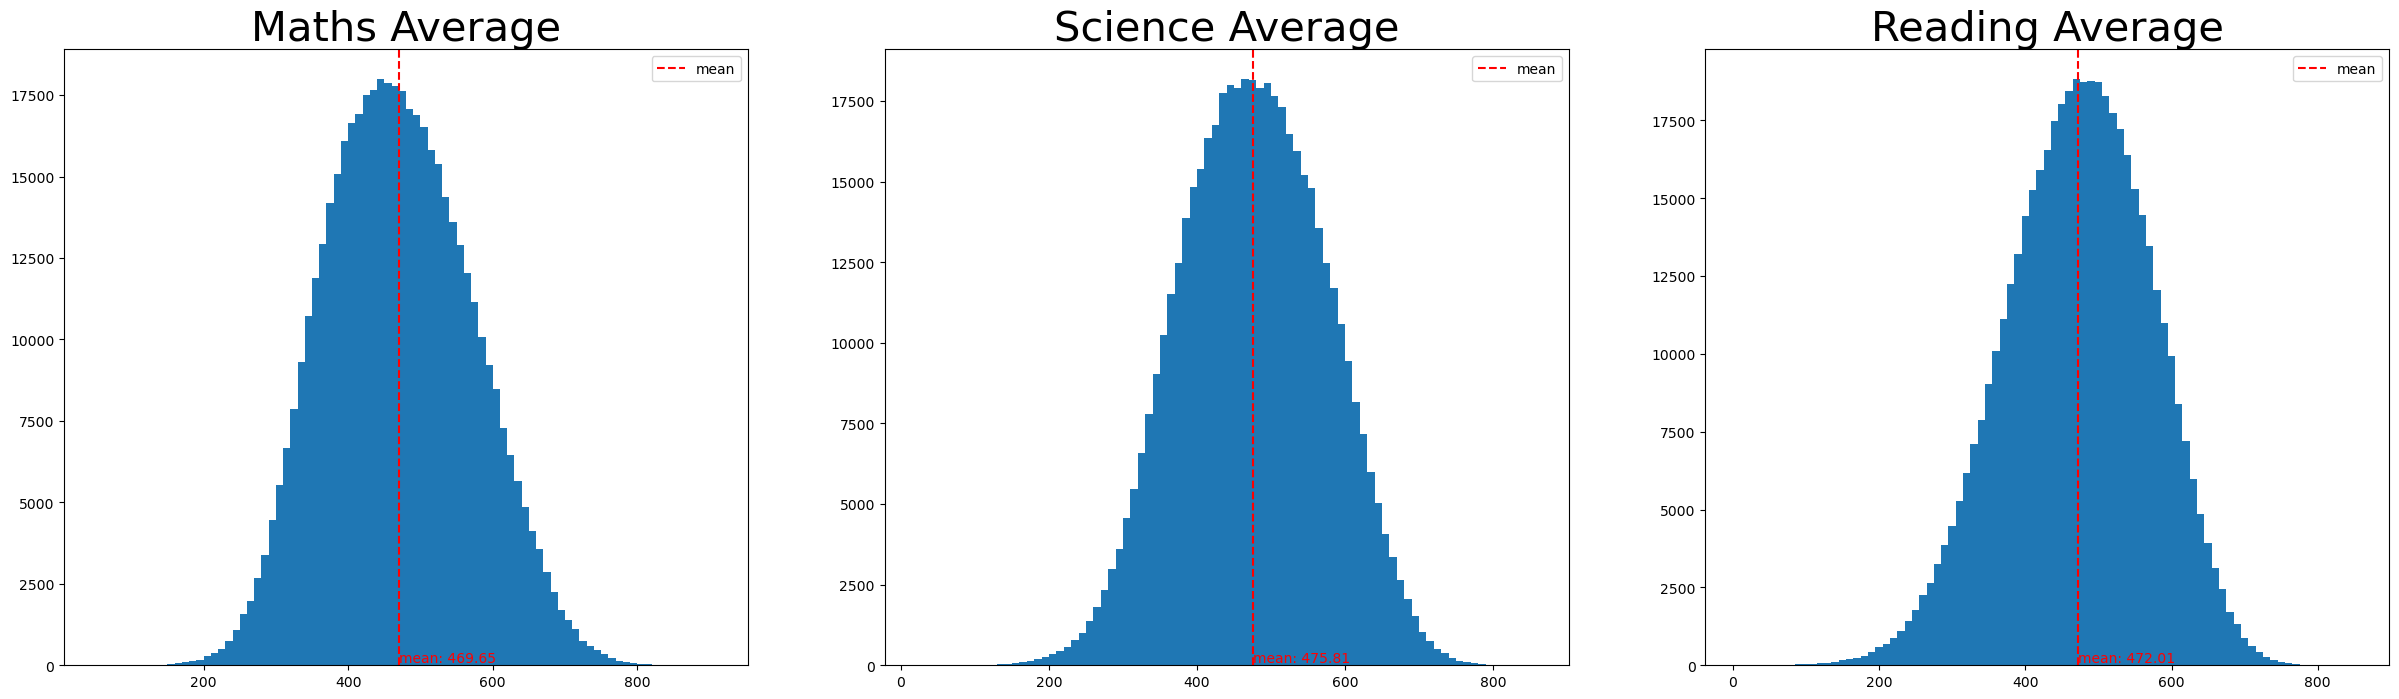

In [32]:
#creating histograms of three interested subject to have a proper look at their distribution

math_bins=np.arange(50,df_pisa_clean['MATH'].max()+10,10)
reading_bins=np.arange(5,df_pisa_clean['READING'].max()+10,10)
science_bins=np.arange(20,df_pisa_clean['SCIENCE'].max()+10,10)

plt.figure(figsize=(30,8))
plt.subplot(1, 3, 1)
plt.hist(df_pisa_clean['MATH'],bins=math_bins);
plt.title('Maths Average',fontsize=30)
plt.axvline(df_pisa_clean['MATH'].mean(), color='r', linestyle='--', label='mean')
plt.text(df_pisa_clean['MATH'].mean(), 0.01, f"mean: {df_pisa_clean['MATH'].mean():.2f}", ha='left', va = 'bottom', color='r')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(df_pisa_clean['SCIENCE'],bins=science_bins);
plt.title('Science Average',fontsize=30)
plt.axvline(df_pisa_clean['SCIENCE'].mean(), color='r', linestyle='--', label='mean')
plt.text(df_pisa_clean['SCIENCE'].mean(), 0.01, f"mean: {df_pisa_clean['SCIENCE'].mean():.2f}", ha='left', va = 'bottom', color='r')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(df_pisa_clean['READING'],bins=reading_bins);
plt.title('Reading Average',fontsize=30)
plt.axvline(df_pisa_clean['READING'].mean(), color='r', linestyle='--', label='mean')
plt.text(df_pisa_clean['READING'].mean(), 0.01, f"mean: {df_pisa_clean['READING'].mean():.2f}", ha='left', va = 'bottom', color='r')
plt.legend()


> **OBSERVATION**: It seems that they are normal distributions. It also indicates the mean values for three interested subjects. Based on the mean of the distribution, it seems that relatively students are performing better in science then reading and then maths accordingly with slightly small margin of difference.  

> **QUESTION**: How are the outliers in scores accross these three subjects?

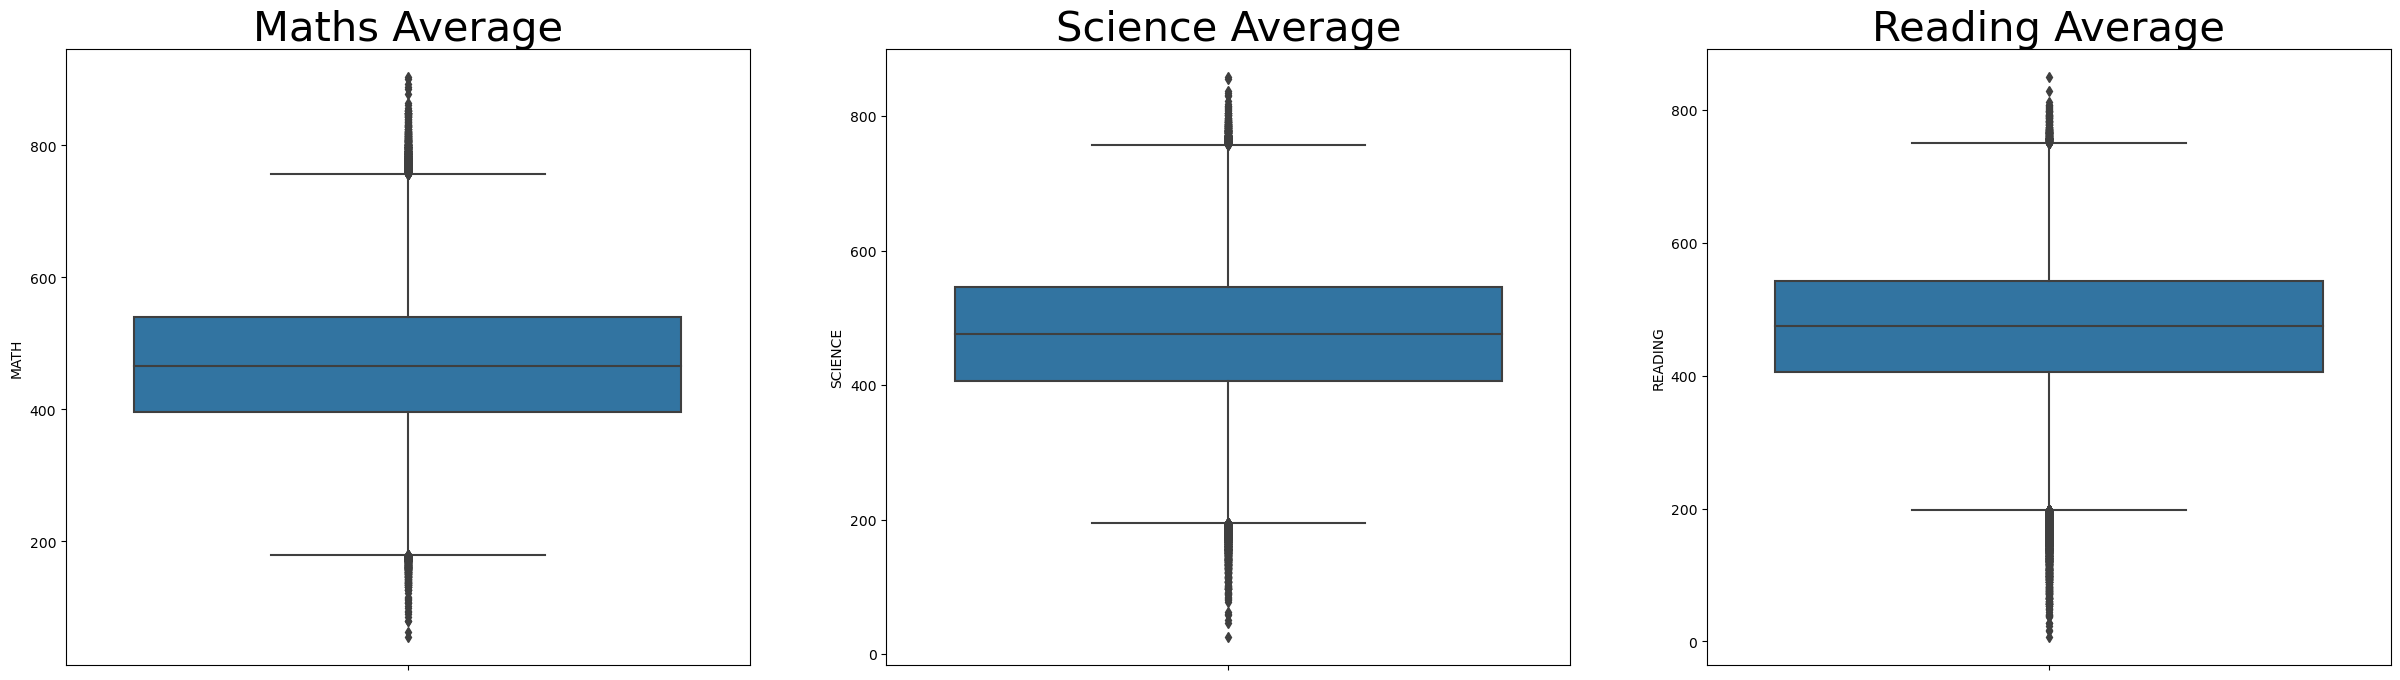

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 8))
sns.boxplot(y=df_pisa_clean.MATH, ax=ax1)
sns.boxplot(y=df_pisa_clean.SCIENCE, ax=ax2)
sns.boxplot(y=df_pisa_clean.READING, ax=ax3)

ax1.set_title("Maths Average", fontsize = 30)
ax2.set_title("Science Average", fontsize = 30)
ax3.set_title("Reading Average", fontsize = 30)
# Display the plot
plt.show()

> **OBSERVATION**: Box plots are usefull when we want to have a look to variables, if there are any outliers. As it seems, there are no effective outliers in all three interested subjects which can change the outcome of our assessments. 

> **QUESTION**: How students are categorized from family wealth point of view?

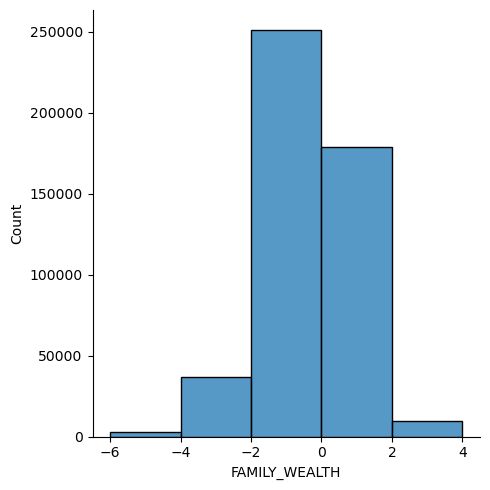

In [34]:
sns.displot(df_pisa_clean.FAMILY_WEALTH, bins = [-6, -4, -2, 0, 2, 4])

> **OBSERVATION**: Most of students are categorized under 0. In order to understand well, family wealth comprised of the following items, if a student owns in his house: A room of your own, A link to the Internet, Cellular phones, TV, Computer, Car and room with a bath or shower. 

> **QUESTION**: Are the majority of students have access to ICT at home? 

1.2703023117960877

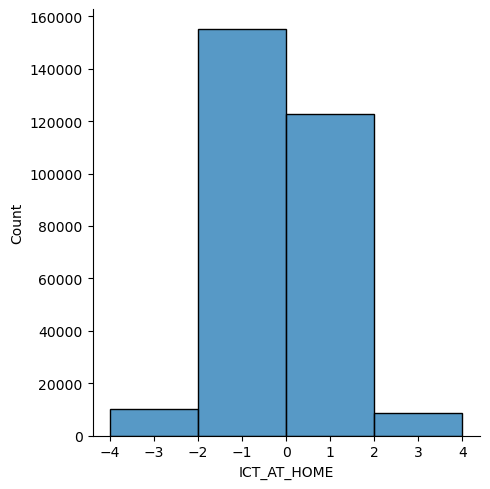

In [35]:
sns.displot(df_pisa_clean.ICT_AT_HOME, bins = [-4, -2, 0, 2, 4])
df_pisa_clean.query('ICT_AT_HOME<=0').STUDENT_ID.count()/df_pisa_clean.query('ICT_AT_HOME>0').STUDENT_ID.count()

> **OBSERVATION**: It shows that majority of students are lower or equal than 0 in having ICT at home. ICT at home comprised of having desktop/laptop computer, own cell phone with/without internet, music player, printer, usb and ebook reader.

> **QUESTION**: Are the majority of students have access to entertainment ICT at home? 

1.1786895167242346

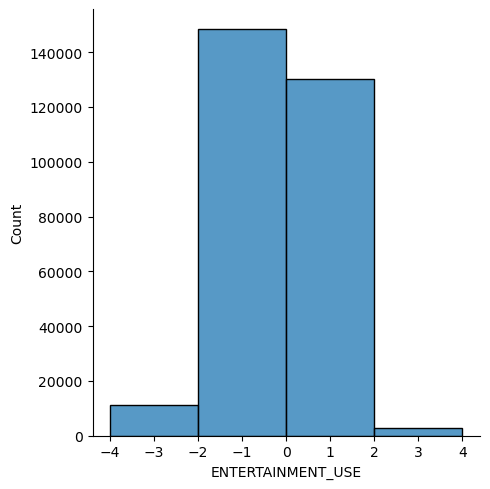

In [36]:
sns.displot(df_pisa_clean.ENTERTAINMENT_USE, bins = [-4, -2, 0, 2, 4])
df_pisa_clean.query('ENTERTAINMENT_USE<=0').STUDENT_ID.count()/df_pisa_clean.query('ENTERTAINMENT_USE>0').STUDENT_ID.count()

> **OBSERVATION**: It shows that majority of students are lower or equal than 0 in having entertainment ICT at home, i.e. playing games, participating in social media networks and etc. However this proportion is slightly lower than having ICT at home in general. 

> **QUESTION**: How gender among students is distributed?

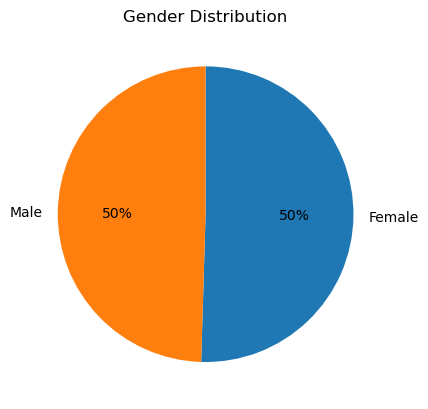

In [37]:
# To examine how the gender balance is distributed. 

value_counts = df_pisa_clean['GENDER'].value_counts()

# Create a pie chart
plt.pie(value_counts, labels = value_counts.index, startangle = 90, counterclock = False, autopct='%1.0f%%')
plt.title('Gender Distribution')
# Display the plot
plt.show()

> **OBSERVATION**: Gender distribution is equally balanced between male and female students who have been tested.

> **QUESTION**: How students are distributed from immigration point of view?

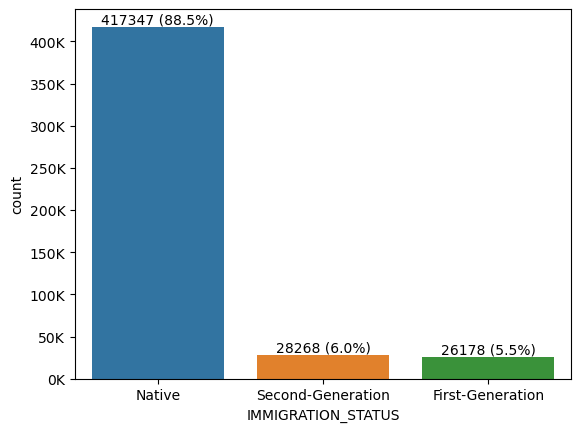

In [38]:
# Examine the distribution of categorical values, such as IMMIGRATION_STATUS, MOTHER_EDUC_LEVEL, FATHER_EDUC_LEVEL, FAMILY_STRUCTURE
ax = sns.countplot(x=df_pisa_clean.IMMIGRATION_STATUS, data=df_pisa_clean)
abs_values = df_pisa_clean.IMMIGRATION_STATUS.value_counts()
rel_values = df_pisa_clean.IMMIGRATION_STATUS.value_counts(normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.1f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)

# Define a formatting function for the y-axis tick labels
def format_yticklabels(value, tick_number):
    return "{:.0f}K".format(value/1000)

# Set the y-axis tick labels using the formatting function
ax.yaxis.set_major_formatter(FuncFormatter(format_yticklabels))

# Show the plot
plt.show()

> **Observation**: It seems that native respondent students are the majority in PISA, while also can be examined that second generation and first generation immigrated students are also existing. It will be interesting to exammine in next chapters, how these generations are performing in each subjec respectively. 

> **QUESTION**: How parents education level is distributed? 

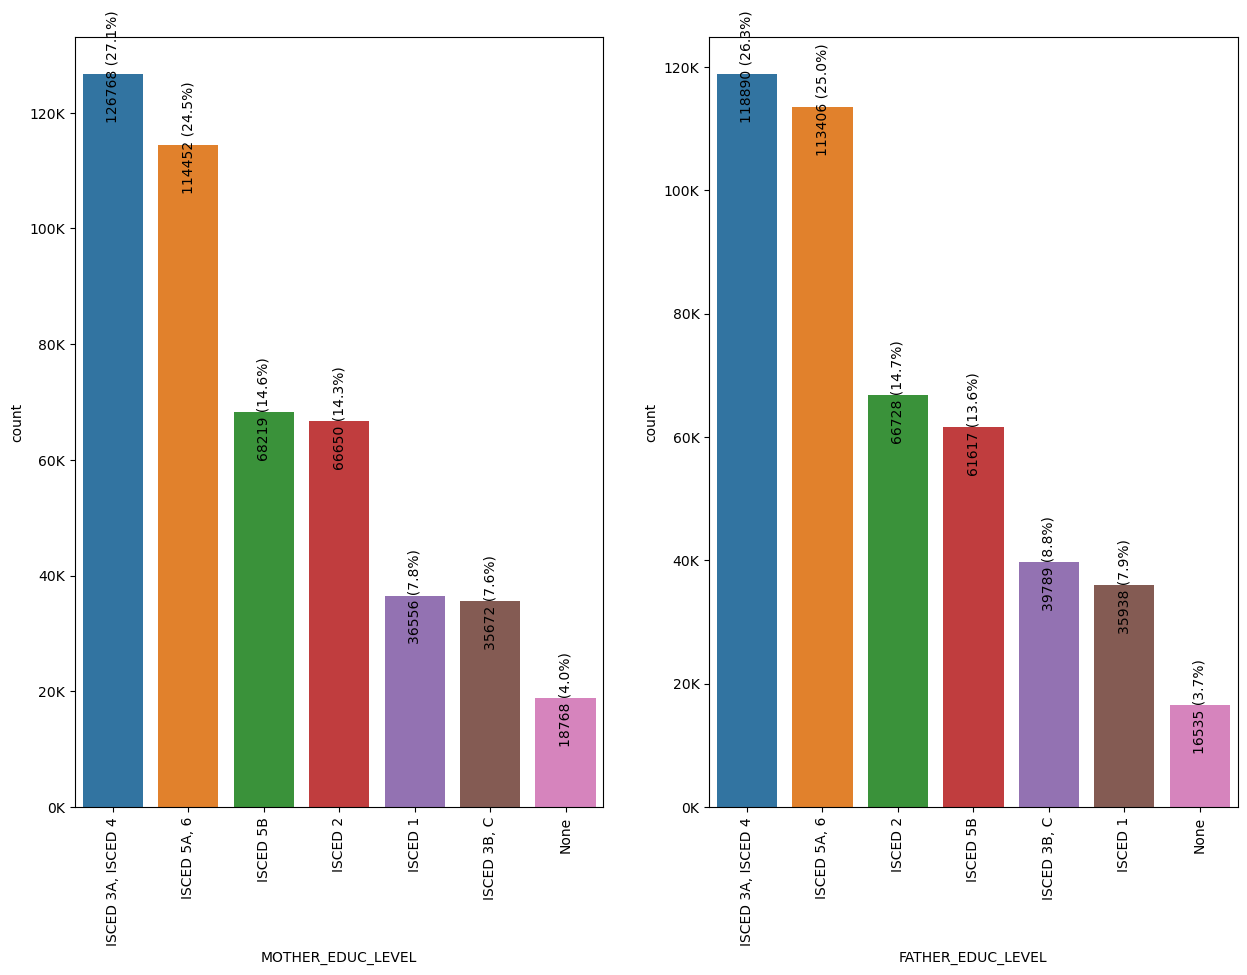

In [39]:
# Examine the distribution of categorical values, such as IMMIGRATION_STATUS, MOTHER_EDUC_LEVEL, FATHER_EDUC_LEVEL, FAMILY_STRUCTURE

plt.figure(figsize=(15,10))

plt.subplot(1, 2, 1)
ax = sns.countplot(x=df_pisa_clean.MOTHER_EDUC_LEVEL, order=df_pisa_clean.MOTHER_EDUC_LEVEL.value_counts(ascending=False).index,  data=df_pisa_clean)
abs_values = df_pisa_clean.MOTHER_EDUC_LEVEL.value_counts(ascending = False)
rel_values = df_pisa_clean.MOTHER_EDUC_LEVEL.value_counts(ascending = False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.1f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls,  rotation = 90, padding = -35)

# Define a formatting function for the y-axis tick labels
def format_yticklabels(value, tick_number):
    return "{:.0f}K".format(value/1000)

# Set the y-axis tick labels using the formatting function
ax.yaxis.set_major_formatter(FuncFormatter(format_yticklabels))

ax.tick_params(axis='x', rotation=90)


plt.subplot(1, 2, 2)
ax = sns.countplot(x=df_pisa_clean.FATHER_EDUC_LEVEL, order=df_pisa_clean.FATHER_EDUC_LEVEL.value_counts(ascending=False).index,  data=df_pisa_clean)
abs_values = df_pisa_clean.FATHER_EDUC_LEVEL.value_counts(ascending = False)
rel_values = df_pisa_clean.FATHER_EDUC_LEVEL.value_counts(ascending = False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.1f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls,  rotation = 90, padding = -35)

# Define a formatting function for the y-axis tick labels
def format_yticklabels(value, tick_number):
    return "{:.0f}K".format(value/1000)

# Set the y-axis tick labels using the formatting function
ax.yaxis.set_major_formatter(FuncFormatter(format_yticklabels))

ax.tick_params(axis='x', rotation=90)
# Show the plot
plt.show()



> **Observation**: First, we have to understand the categories:
- ISCED 1 (primary education)
- ISCED 2 (lower secondary)
- ISCED Level 3B or 3C (vocational/pre-vocational upper secondary)
- ISCED 3A (general upper secondary) and/or ISCED 4 (non-tertiary post-secondary)
- ISCED 5B (vocational tertiary)
- ISCED 5A, 6 (theoretically oriented tertiary and post-graduate).
> It seeems that Most of mothers are having general or vocational upper/post secondary eduction. In father eduction, it seems that most of the fathers having the same education level as mothers, but it seems that fathers with no eduction are slightly less than mothers with no education. 

> **QUESTION**: How is the family structure among tested students?

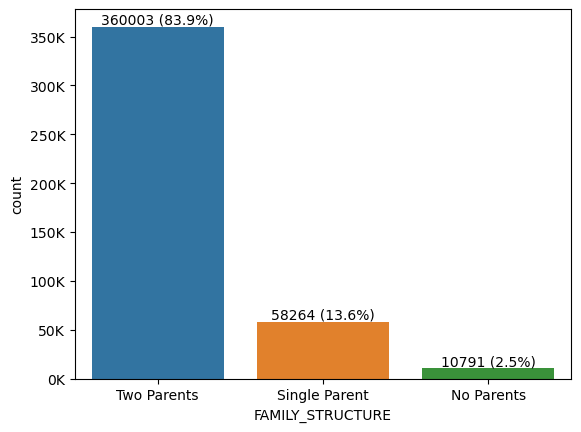

In [40]:
# Examine the distribution of categorical values, such as IMMIGRATION_STATUS, MOTHER_EDUC_LEVEL, FATHER_EDUC_LEVEL, FAMILY_STRUCTURE
ax = sns.countplot(x=df_pisa_clean.FAMILY_STRUCTURE, order=df_pisa_clean.FAMILY_STRUCTURE.value_counts(ascending=False).index,  data=df_pisa_clean)
abs_values = df_pisa_clean.FAMILY_STRUCTURE.value_counts(ascending = False)
rel_values = df_pisa_clean.FAMILY_STRUCTURE.value_counts(ascending = False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.1f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)

# Define a formatting function for the y-axis tick labels
def format_yticklabels(value, tick_number):
    return "{:.0f}K".format(value/1000)

# Set the y-axis tick labels using the formatting function
ax.yaxis.set_major_formatter(FuncFormatter(format_yticklabels))

ax.tick_params(axis='x', rotation=0)
# Show the plot
plt.show()


> **Observation**: It seems that most of the students are having two parent guardians. It will also be interesting to assess how students are performing with single and no parents. 

### Interesting distributions:

> It will be interesting to see the performance of students with different family struture, with different family wealth status and with different immigration status. Also, it will be interesting to see how students perform better in each subject from gender point of view or from parents education level. 

### Unusual distributions or any data modification:

> Categorizing the value columns of Family wealth, ICT at home and Entertainment ICT at home were done in order to understand better the categories. First its minimum and maximum values were assessed then the bins were defined. 

## Bivariate Exploration

> In this section, we will investigate relationships between pairs of variables in our
data. Make sure the variables that we cover here have been introduced in some
fashion in the previous section (univariate exploration).

> **QUESTION**: How students are performing well in all three subjects considering their family structure?

In [41]:
# now we will examine if family structure is playing any role in performance of students in the mentioned three subjects.
df_pisa_FAM = df_pisa_clean.groupby('FAMILY_STRUCTURE')[['MATH','READING','SCIENCE']].mean()

<AxesSubplot:xlabel='FAMILY_STRUCTURE'>

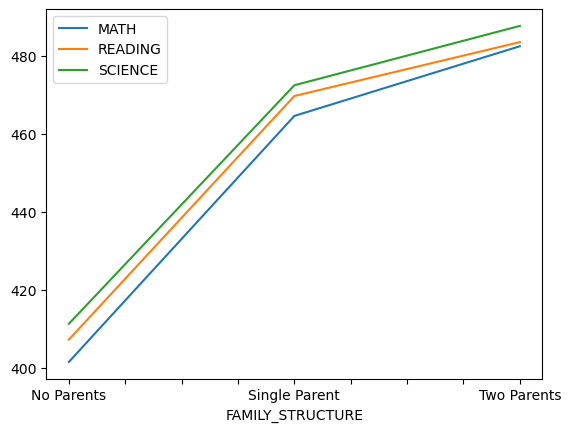

In [42]:
df_pisa_FAM.plot()

> **Observation**: It seems that family structure is playing a key role in performance of students in all three subjects. 

> **QUESTION**: How the mothers' education level impact the performance of students in all three subjects?

Text(0, 0.5, '')

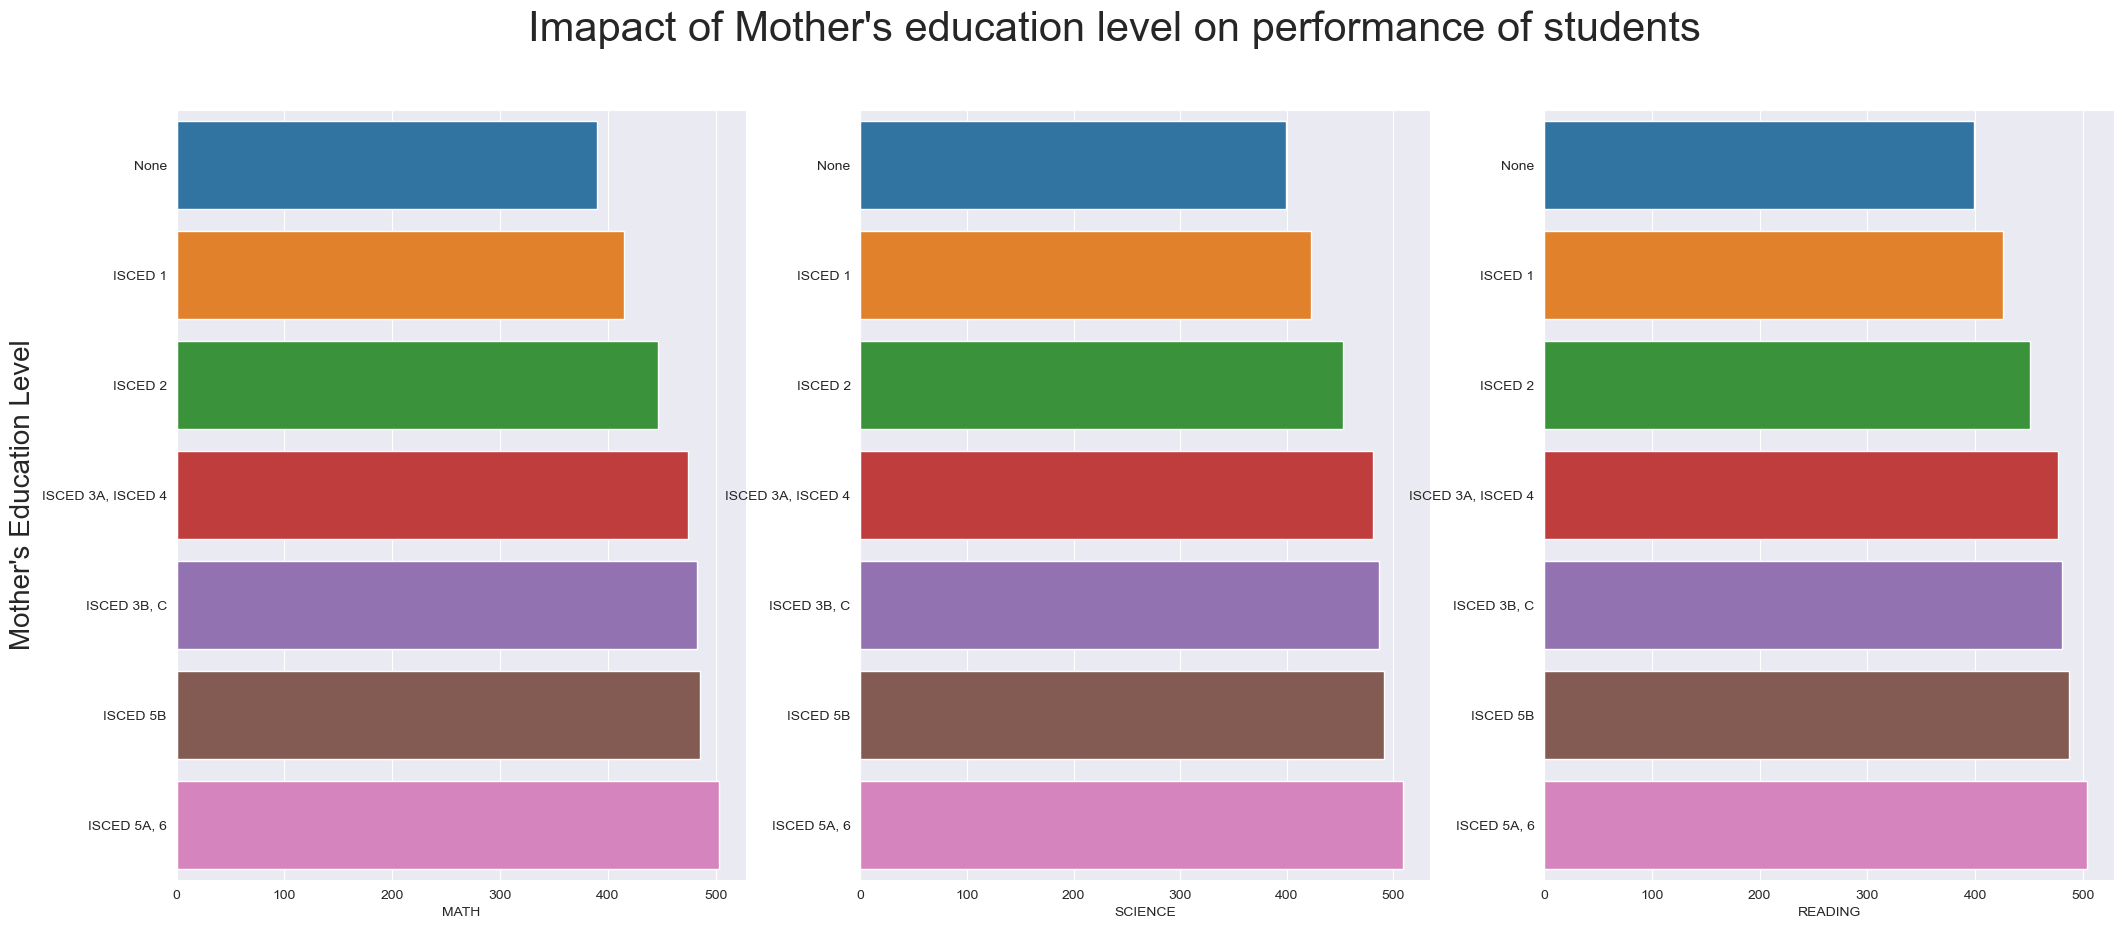

In [171]:
# we will examine the impact of mother's education level on students performance in different subjects: 

df_pisa_MISCED = df_pisa_clean.groupby('MOTHER_EDUC_LEVEL')[['MATH','READING','SCIENCE']].mean()
plt.figure(figsize=(25,10))
plt.suptitle("Imapact of Mother's education level on performance of students", fontsize = 30)

plt.subplot(1, 3, 1)
ax = sns.barplot(x = 'MATH', y = df_pisa_MISCED.index, data = df_pisa_MISCED, order = df_pisa_MISCED.sort_values(by = 'MATH').index)
ax.set_ylabel("Mother's Education Level", fontsize = '20')
plt.subplot(1, 3, 2)
ax = sns.barplot(x = 'SCIENCE', y = df_pisa_MISCED.index, data = df_pisa_MISCED, order = df_pisa_MISCED.sort_values(by = 'SCIENCE').index)
ax.set_ylabel("")
plt.subplot(1, 3, 3)
ax = sns.barplot(x = 'READING', y = df_pisa_MISCED.index, data = df_pisa_MISCED, order = df_pisa_MISCED.sort_values(by = 'READING').index)
ax.set_ylabel("")


> **Observation:** It seems that education level of mother is impacting the performance of students in all three subjects. Interesting point is that ISCED 3B and 3C education level of mother is impacting more than ISCED 3A and 4 level in all three subjects. Means that mothers with vocation/pre-vocation upper secondary education is impacting well than mothers with general upper secondary or non-tertiary post secondary education. 


> **QUESTION**: How the fathers' education level impact the performance of students in all three subjects?

Text(0, 0.5, '')

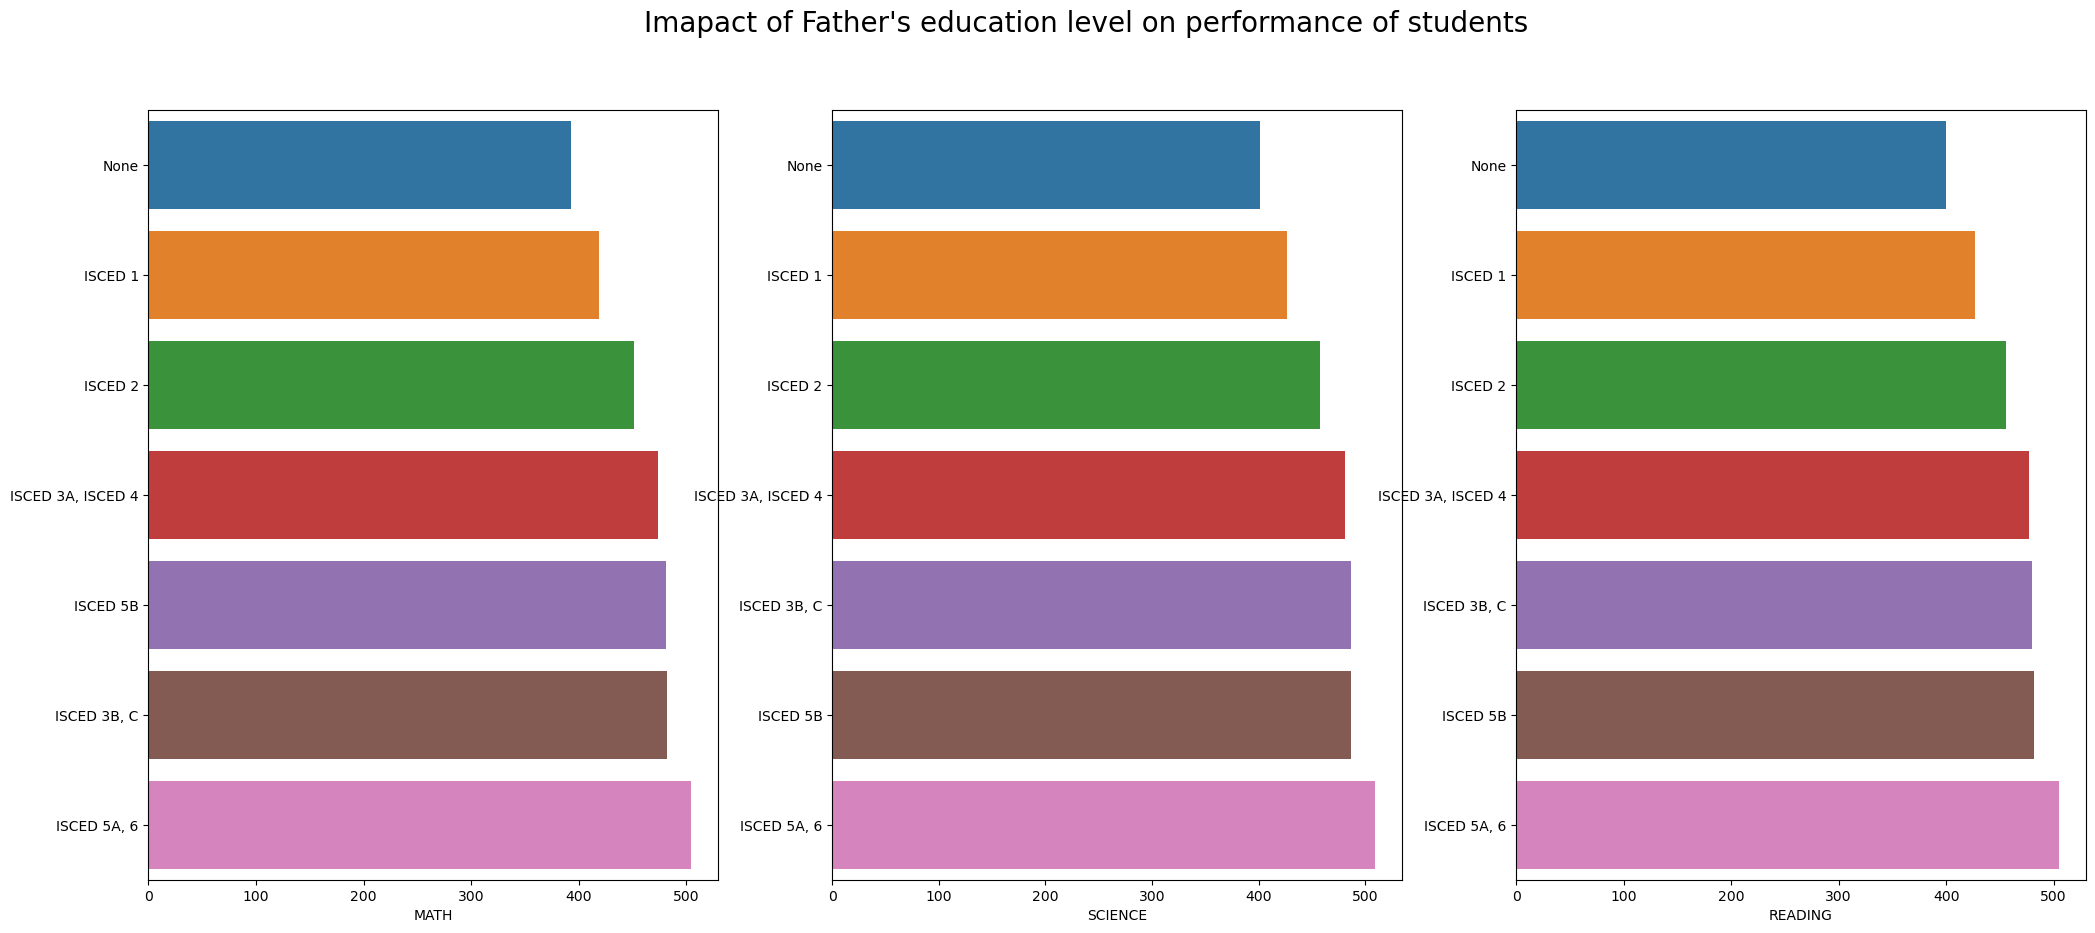

In [46]:
#examine the impact of father's education level on students performance in different subjects: 
df_pisa_FISCED = df_pisa_clean.groupby('FATHER_EDUC_LEVEL')[['MATH','READING','SCIENCE']].mean()
plt.figure(figsize=(25,10))
plt.suptitle("Imapact of Father's education level on performance of students", fontsize = 20)

plt.subplot(1, 3, 1)
ax = sns.barplot(x = 'MATH', y = df_pisa_FISCED.index, data = df_pisa_FISCED, order = df_pisa_FISCED.sort_values(by = 'MATH').index)
ax.set_ylabel("")
plt.subplot(1, 3, 2)
ax = sns.barplot(x = 'SCIENCE', y = df_pisa_FISCED.index, data = df_pisa_FISCED, order = df_pisa_FISCED.sort_values(by = 'SCIENCE').index)
ax.set_ylabel("")
plt.subplot(1, 3, 3)
ax = sns.barplot(x = 'READING', y = df_pisa_FISCED.index, data = df_pisa_FISCED, order = df_pisa_FISCED.sort_values(by = 'READING').index)
ax.set_ylabel("")

> **Observation:** It seems that in Math subject, fathers with vocational upper secondary are having greater impacts on the success of students in comparison of fathers having post secondary or even vocational tertiary education levels. In science and reading subjects, fathers with vocational upper secondary are performing better than those with general upper secondary or post secondary. 

> **QUESTION**: How both parents' education level impact the performance of students in all three subjects?

Text(50.72222222222221, 0.5, "Father's education")

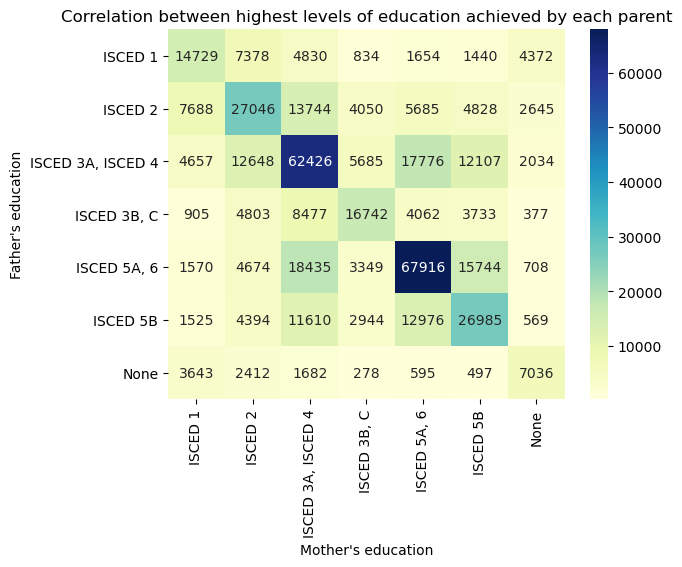

In [47]:
educations = df_pisa_clean.groupby(['FATHER_EDUC_LEVEL','MOTHER_EDUC_LEVEL']).size().reset_index(name='count')
ed = educations.pivot("FATHER_EDUC_LEVEL", "MOTHER_EDUC_LEVEL", "count")
# define the plot
ax = sns.heatmap(ed, annot=True, fmt='d', cmap="YlGnBu")
ax.set_title('Correlation between highest levels of education achieved by each parent')
ax.set_xlabel('Mother\'s education')
ax.set_ylabel('Father\'s education')


> **Observation:** It shows a higher correlation between each parent's education level. As it seems, mothers and fathers with ISCED 5A,6 and ISCED 3A,4 are having the highest impact on success of students in all listed three subjects. 

> **QUESTION**: Top 10 well and Top 10 worst countries based on the performance of students in all three subjects.

In [48]:
#Now we will examine the top 10 countries in every subject: 
df_pisa_country = df_pisa_clean.groupby('COUNTRY')[['MATH','READING','SCIENCE',]].mean()

Text(0, 0.5, '')

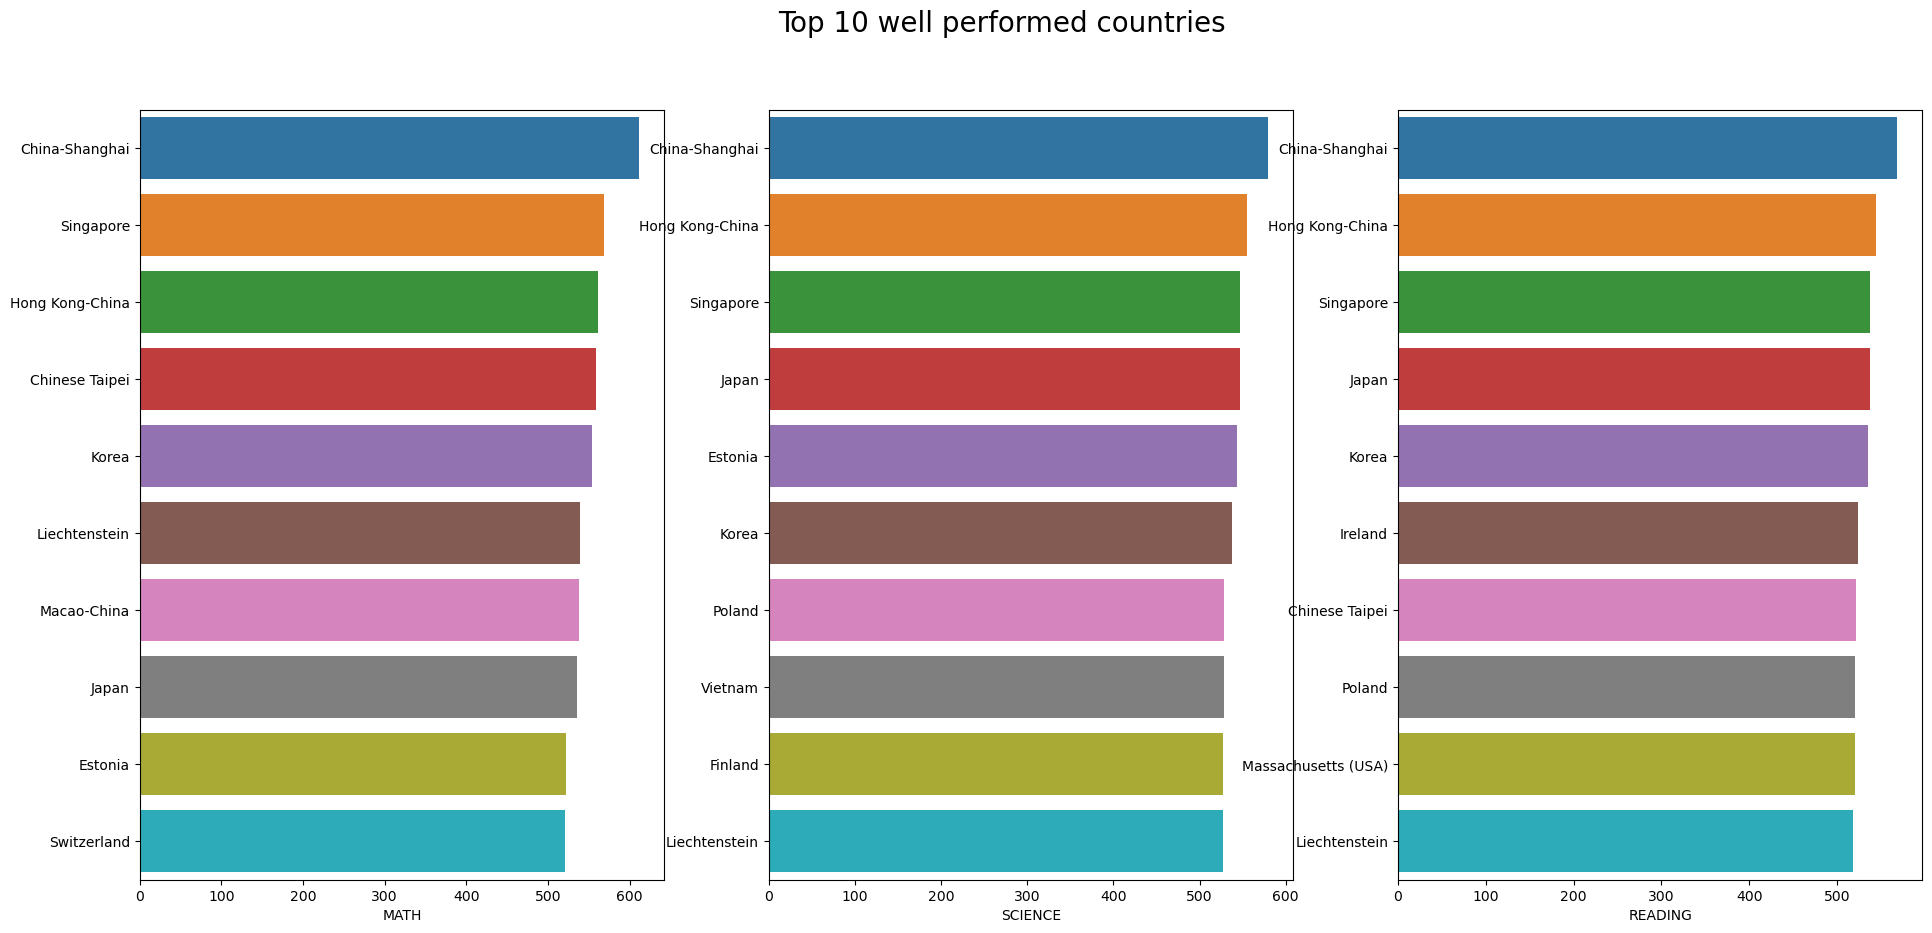

In [49]:
plt.figure(figsize=(23,10))
plt.suptitle("Top 10 well performed countries", fontsize = 20)

plt.subplot(1, 3, 1)
top_10_maths = df_pisa_country.sort_values(by="MATH", ascending=False).head(10)
ax = sns.barplot(x = 'MATH', y = top_10_maths.index, data = top_10_maths)
ax.set_ylabel("")

plt.subplot(1, 3, 2)
top_10_science = df_pisa_country.sort_values(by="SCIENCE", ascending=False).head(10)
ax = sns.barplot(x = 'SCIENCE', y = top_10_science.index, data = top_10_science)
ax.set_ylabel("")

plt.subplot(1, 3, 3)
top_10_reading = df_pisa_country.sort_values(by="READING", ascending=False).head(10)
ax = sns.barplot(x = 'READING', y = top_10_reading.index, data = top_10_reading)
ax.set_ylabel("")

Text(0, 0.5, '')

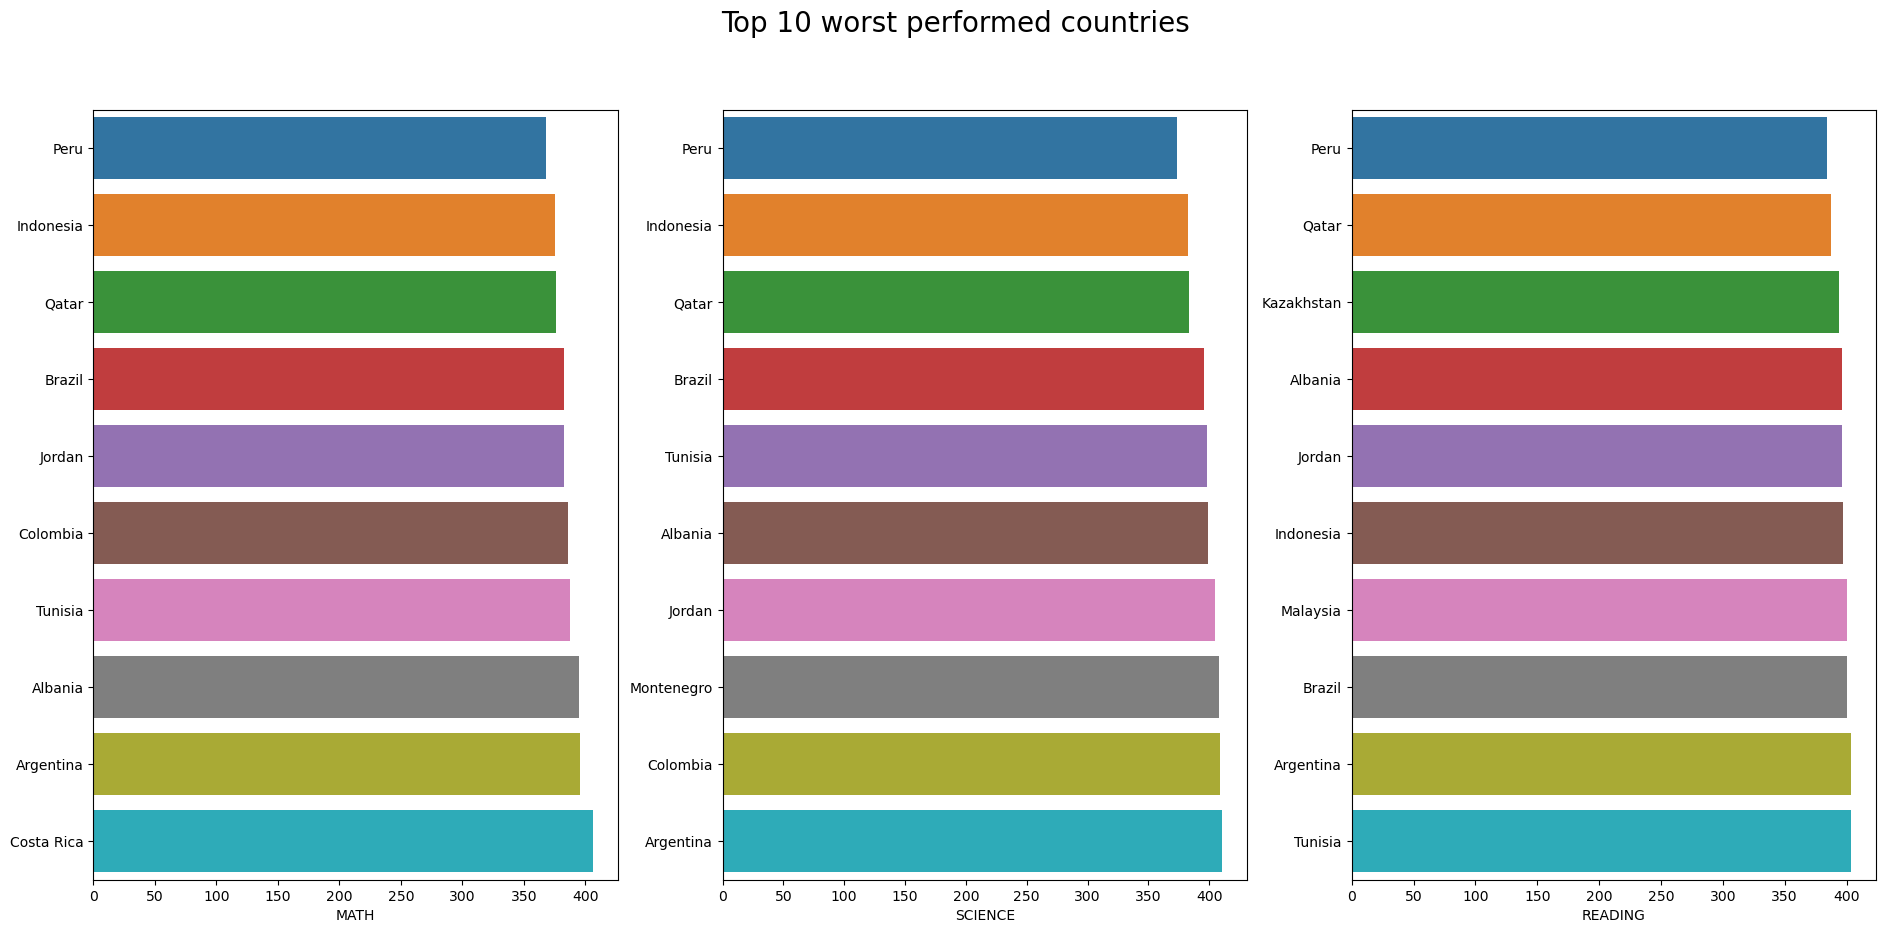

In [50]:

plt.figure(figsize=(23,10))
plt.suptitle("Top 10 worst performed countries", fontsize = 20)

plt.subplot(1, 3, 1)
top_10_maths = df_pisa_country.sort_values(by="MATH", ascending=True).head(10)
ax = sns.barplot(x = 'MATH', y = top_10_maths.index, data = top_10_maths)
ax.set_ylabel("")

plt.subplot(1, 3, 2)
top_10_science = df_pisa_country.sort_values(by="SCIENCE", ascending=True).head(10)
ax = sns.barplot(x = 'SCIENCE', y = top_10_science.index, data = top_10_science)
ax.set_ylabel("")

plt.subplot(1, 3, 3)
top_10_reading = df_pisa_country.sort_values(by="READING", ascending=True).head(10)
ax = sns.barplot(x = 'READING', y = top_10_reading.index, data = top_10_reading)
ax.set_ylabel("")

>  **Observation**: It seems that most of east asian countries are at top in the list. 

> **QUESTION**: How is the relationship between each subject?

Text(0.5, 0.9, 'correlation: 0.91')

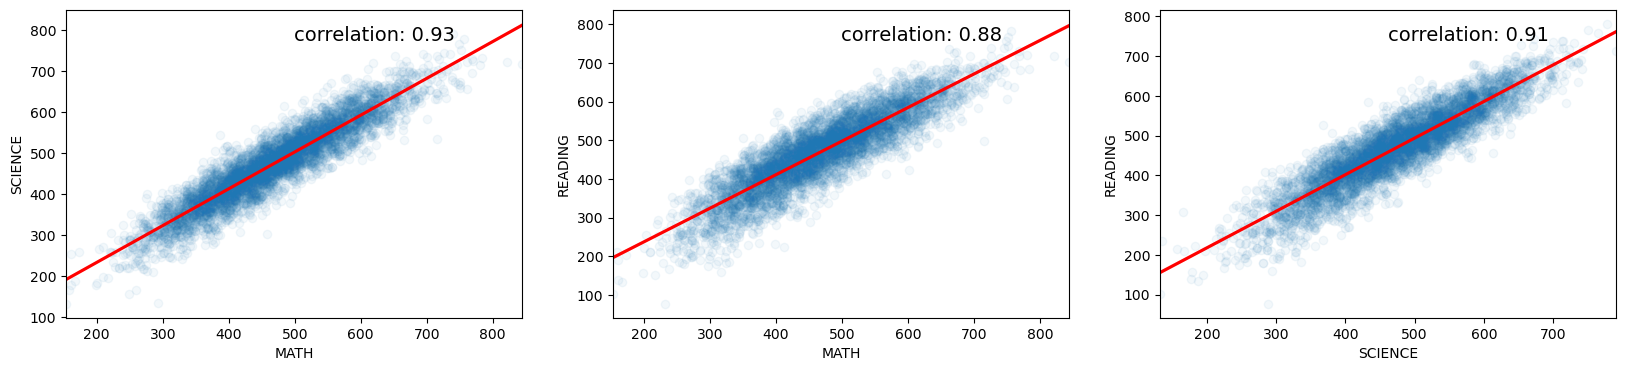

In [51]:
#now we will examine the relationship between subjects: 

df_pisa_sample = df_pisa_clean.sample(5000)
plt.figure(figsize = [20, 4])

ax1 = plt.subplot(1, 3, 1)
sns.regplot(x = 'MATH', y= 'SCIENCE', data = df_pisa_sample, scatter_kws={'alpha':1/20}, line_kws={"color": "red"})
coef, p = stats.pearsonr(df_pisa_sample['MATH'], df_pisa_sample['SCIENCE'])
# Add the correlation coefficient to the plot
plt.annotate(f'correlation: {round(coef,2)}',xy=(0.5, 0.9), xycoords='axes fraction', color='black', fontsize=14)

ax2 = plt.subplot(1, 3, 2) 
sns.regplot(x = 'MATH', y= 'READING', data = df_pisa_sample, scatter_kws={'alpha':1/20}, line_kws={"color": "red"})
coef, p = stats.pearsonr(df_pisa_sample['MATH'], df_pisa_sample['READING'])
# Add the correlation coefficient to the plot
plt.annotate(f'correlation: {round(coef,2)}',xy=(0.5, 0.9), xycoords='axes fraction', color='black', fontsize=14)

ax3 = plt.subplot(1, 3, 3)
sns.regplot(x = 'SCIENCE', y= 'READING', data = df_pisa_sample, scatter_kws={'alpha':1/20}, line_kws={"color": "red"})
coef, p = stats.pearsonr(df_pisa_sample['SCIENCE'], df_pisa_sample['READING'])
# Add the correlation coefficient to the plot
plt.annotate(f'correlation: {round(coef,2)}',xy=(0.5, 0.9), xycoords='axes fraction', color='black', fontsize=14)

<AxesSubplot:>

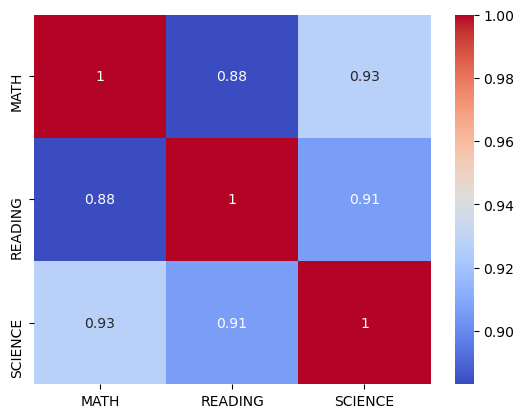

In [52]:
corr = df_pisa_clean[['MATH', 'READING', 'SCIENCE']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

> **Observation**: Our analysis reveals a strong correlation between all subjects. This suggests that if a student excels in one of these subjects, they will likely excel in the other two as well. However, it's worth noting that the correlation between math and science is particularly strong, while the correlation between math and reading is comparatively weaker

> **QUESTION**: Lets see if ICT at home and use of ICT for entertainment at home having any impact on performance of students in all three subjects?

Text(0.5, 0.9, 'correlation: 0.08')

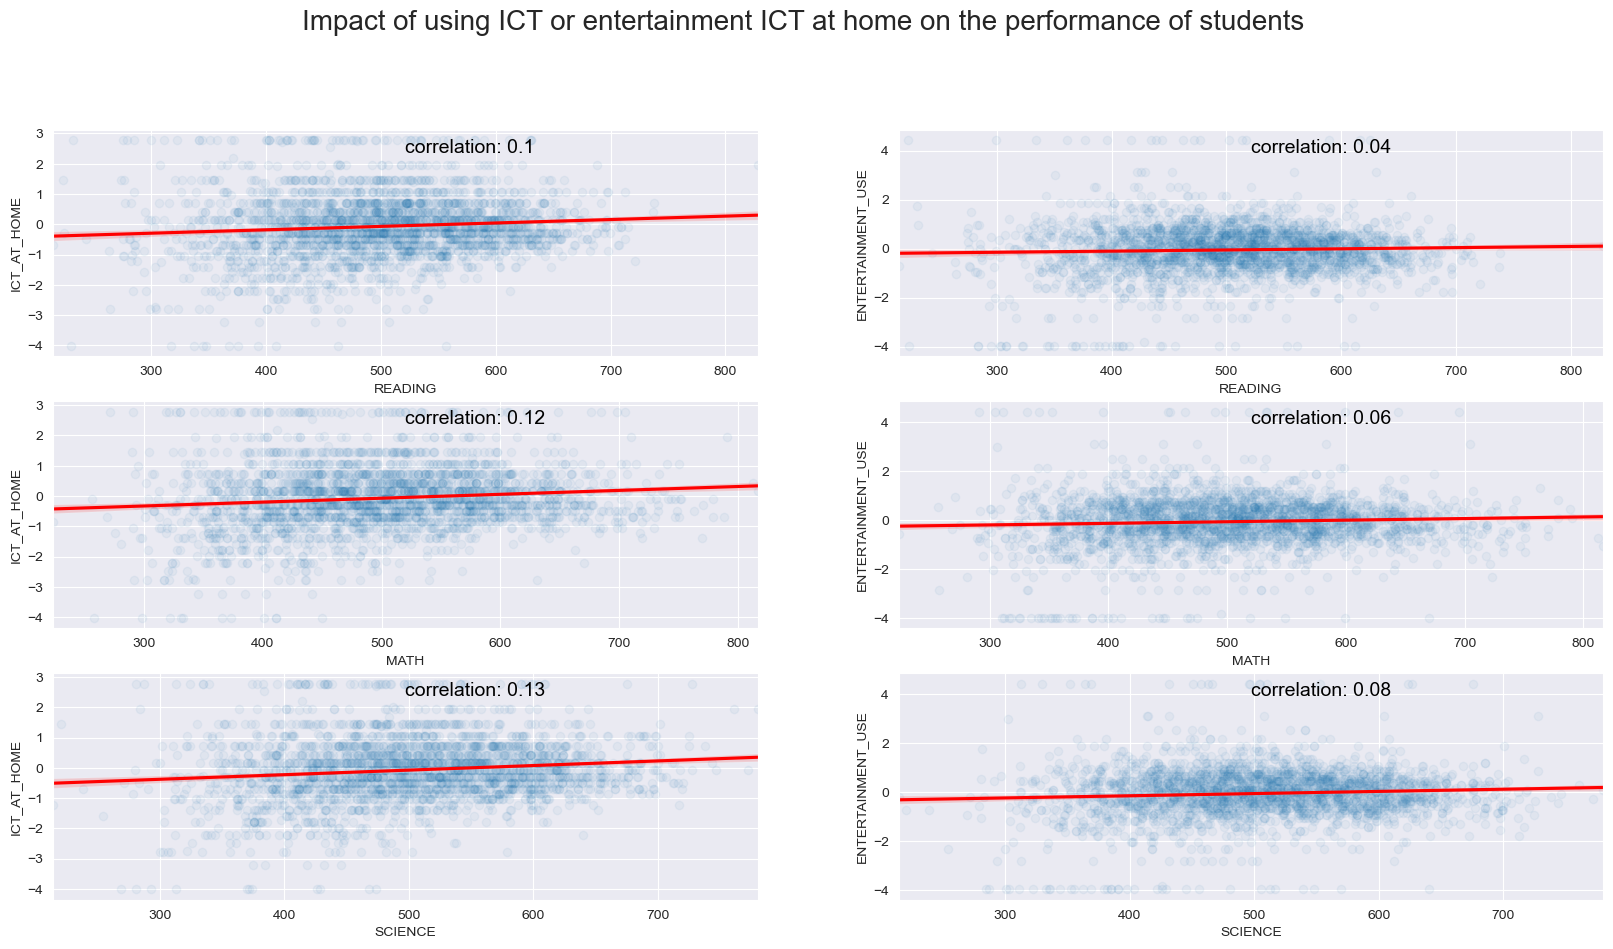

In [138]:
#now we will examine the relationship between subjects AND use of ICT at home and use of other entertainment ICT at home i.e. games

df_pisa_sample = df_pisa_clean.sample(5000)
df_pisa_sample = df_pisa_sample.dropna()
plt.figure(figsize = [20, 10])
plt.suptitle("Impact of using ICT or entertainment ICT at home on the performance of students", fontsize = 20, y = 1)
ax1 = plt.subplot(3, 2, 1)
sns.regplot(x = 'READING', y= 'ICT_AT_HOME', data = df_pisa_sample, scatter_kws={'alpha':1/20}, line_kws={"color": "red"})
coef, p = stats.pearsonr(df_pisa_sample['READING'], df_pisa_sample['ICT_AT_HOME'])
# Add the correlation coefficient to the plot
plt.annotate(f'correlation: {round(coef,2)}',xy=(0.5, 0.9), xycoords='axes fraction', color='black', fontsize=14)

ax2 = plt.subplot(3, 2, 2) 
sns.regplot(x = 'READING', y= 'ENTERTAINMENT_USE', data = df_pisa_sample, scatter_kws={'alpha':1/20}, line_kws={"color": "red"})
coef, p = stats.pearsonr(df_pisa_sample['READING'], df_pisa_sample['ENTERTAINMENT_USE'])
# Add the correlation coefficient to the plot
plt.annotate(f'correlation: {round(coef,2)}',xy=(0.5, 0.9), xycoords='axes fraction', color='black', fontsize=14)

ax3 = plt.subplot(3, 2, 3) 
sns.regplot(x = 'MATH', y= 'ICT_AT_HOME', data = df_pisa_sample, scatter_kws={'alpha':1/20}, line_kws={"color": "red"})
coef, p = stats.pearsonr(df_pisa_sample['MATH'], df_pisa_sample['ICT_AT_HOME'])
# Add the correlation coefficient to the plot
plt.annotate(f'correlation: {round(coef,2)}',xy=(0.5, 0.9), xycoords='axes fraction', color='black', fontsize=14)


ax4 = plt.subplot(3, 2, 4) 
sns.regplot(x = 'MATH', y= 'ENTERTAINMENT_USE', data = df_pisa_sample, scatter_kws={'alpha':1/20}, line_kws={"color": "red"})
coef, p = stats.pearsonr(df_pisa_sample['MATH'], df_pisa_sample['ENTERTAINMENT_USE'])
# Add the correlation coefficient to the plot
plt.annotate(f'correlation: {round(coef,2)}',xy=(0.5, 0.9), xycoords='axes fraction', color='black', fontsize=14)


ax3 = plt.subplot(3, 2, 5) 
sns.regplot(x = 'SCIENCE', y= 'ICT_AT_HOME', data = df_pisa_sample, scatter_kws={'alpha':1/20}, line_kws={"color": "red"})
coef, p = stats.pearsonr(df_pisa_sample['SCIENCE'], df_pisa_sample['ICT_AT_HOME'])
# Add the correlation coefficient to the plot
plt.annotate(f'correlation: {round(coef,2)}',xy=(0.5, 0.9), xycoords='axes fraction', color='black', fontsize=14)


ax4 = plt.subplot(3, 2, 6) 
sns.regplot(x = 'SCIENCE', y= 'ENTERTAINMENT_USE', data = df_pisa_sample, scatter_kws={'alpha':1/20}, line_kws={"color": "red"})
coef, p = stats.pearsonr(df_pisa_sample['SCIENCE'], df_pisa_sample['ENTERTAINMENT_USE'])
# Add the correlation coefficient to the plot
plt.annotate(f'correlation: {round(coef,2)}',xy=(0.5, 0.9), xycoords='axes fraction', color='black', fontsize=14)

> **Observation**: It appears that there is no relationship between the use of ICT at home or the use of entertainment ICT at home and the academic performance of students in these subjects. Despite the notion that spending more time watching TV or using video games at home may negatively impact students' performance in school, our data suggests that any correlation between the two is minimal. However, it is still important to consider the impact of these activities on students' physical and mental health.

> **QUESTION**: Lets see if family wealth, cultural possessions at home and educational resources at home having any impact on performance of students in all three subjects?

Text(0.5, 0.9, 'correlation: 0.26')

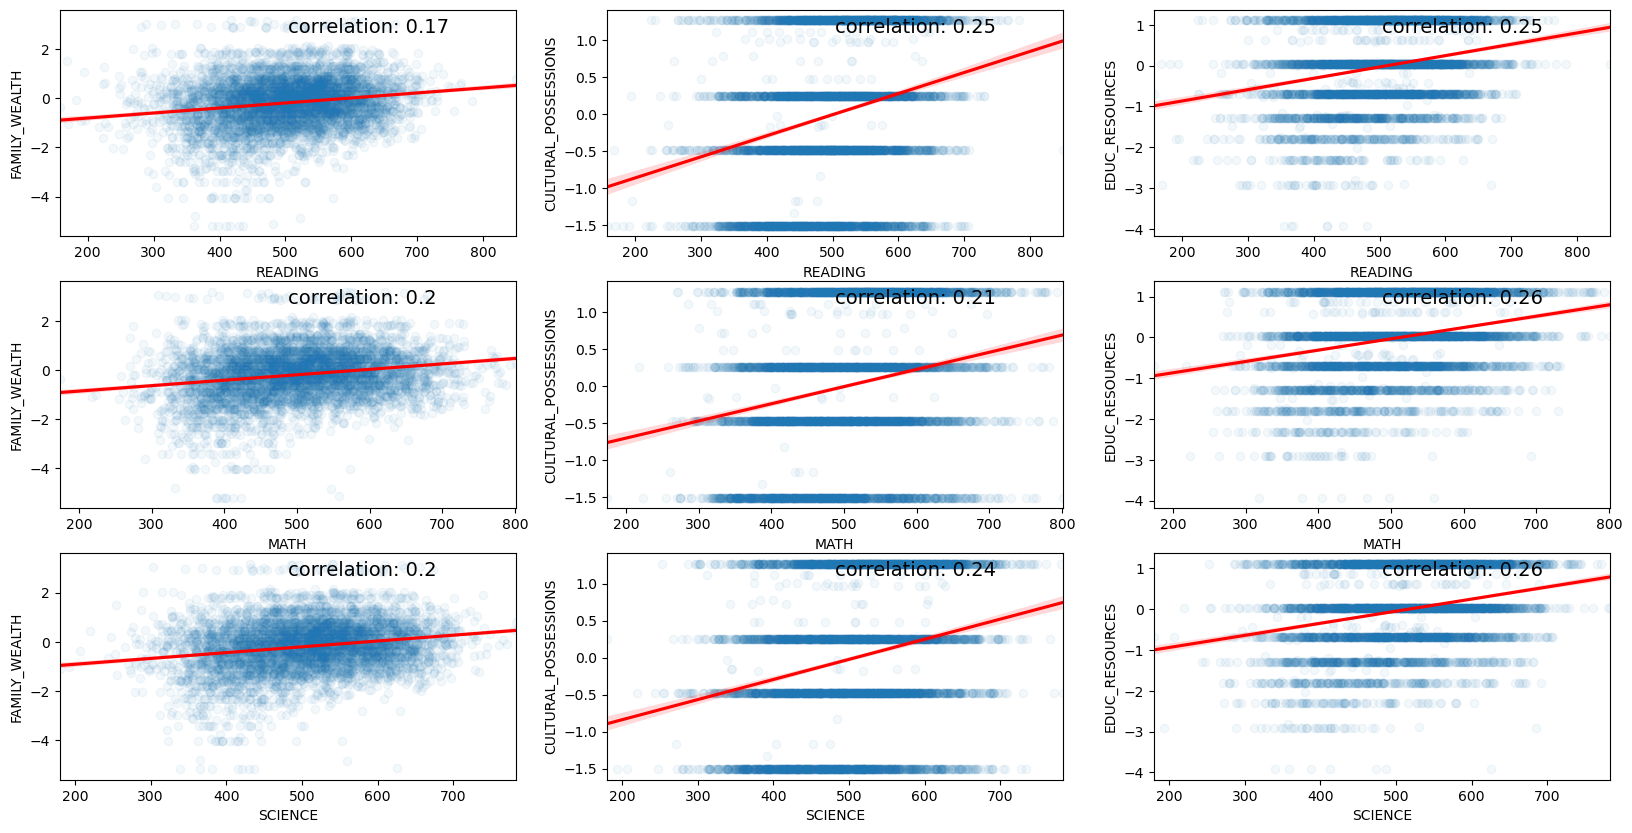

In [54]:
#now we will examine the relationship between subjects AND use of ICT at home and use of other entertainment ICT at home i.e. games

df_pisa_sample = df_pisa_clean.sample(10000)
df_pisa_sample = df_pisa_sample.dropna()
plt.figure(figsize = [20, 10])

ax1 = plt.subplot(3, 3, 1)
sns.regplot(x = 'READING', y= 'FAMILY_WEALTH', data = df_pisa_sample, scatter_kws={'alpha':1/20}, line_kws={"color": "red"})
coef, p = stats.pearsonr(df_pisa_sample['READING'], df_pisa_sample['FAMILY_WEALTH'])
# Add the correlation coefficient to the plot
plt.annotate(f'correlation: {round(coef,2)}',xy=(0.5, 0.9), xycoords='axes fraction', color='black', fontsize=14)

ax2 = plt.subplot(3, 3, 2)
sns.regplot(x = 'READING', y= 'CULTURAL_POSSESSIONS', data = df_pisa_sample, scatter_kws={'alpha':1/20}, line_kws={"color": "red"})
coef, p = stats.pearsonr(df_pisa_sample['READING'], df_pisa_sample['CULTURAL_POSSESSIONS'])
# Add the correlation coefficient to the plot
plt.annotate(f'correlation: {round(coef,2)}',xy=(0.5, 0.9), xycoords='axes fraction', color='black', fontsize=14)

ax3 = plt.subplot(3, 3, 3)
sns.regplot(x = 'READING', y= 'EDUC_RESOURCES', data = df_pisa_sample, scatter_kws={'alpha':1/20}, line_kws={"color": "red"})
coef, p = stats.pearsonr(df_pisa_sample['READING'], df_pisa_sample['EDUC_RESOURCES'])
# Add the correlation coefficient to the plot
plt.annotate(f'correlation: {round(coef,2)}',xy=(0.5, 0.9), xycoords='axes fraction', color='black', fontsize=14)

ax4 = plt.subplot(3, 3, 4)
sns.regplot(x = 'MATH', y= 'FAMILY_WEALTH', data = df_pisa_sample, scatter_kws={'alpha':1/20}, line_kws={"color": "red"})
coef, p = stats.pearsonr(df_pisa_sample['MATH'], df_pisa_sample['FAMILY_WEALTH'])
# Add the correlation coefficient to the plot
plt.annotate(f'correlation: {round(coef,2)}',xy=(0.5, 0.9), xycoords='axes fraction', color='black', fontsize=14)

ax5 = plt.subplot(3, 3, 5)
sns.regplot(x = 'MATH', y= 'CULTURAL_POSSESSIONS', data = df_pisa_sample, scatter_kws={'alpha':1/20}, line_kws={"color": "red"})
coef, p = stats.pearsonr(df_pisa_sample['MATH'], df_pisa_sample['CULTURAL_POSSESSIONS'])
# Add the correlation coefficient to the plot
plt.annotate(f'correlation: {round(coef,2)}',xy=(0.5, 0.9), xycoords='axes fraction', color='black', fontsize=14)

ax6 = plt.subplot(3, 3, 6)
sns.regplot(x = 'MATH', y= 'EDUC_RESOURCES', data = df_pisa_sample, scatter_kws={'alpha':1/20}, line_kws={"color": "red"})
coef, p = stats.pearsonr(df_pisa_sample['MATH'], df_pisa_sample['EDUC_RESOURCES'])
# Add the correlation coefficient to the plot
plt.annotate(f'correlation: {round(coef,2)}',xy=(0.5, 0.9), xycoords='axes fraction', color='black', fontsize=14)

ax7 = plt.subplot(3, 3, 7)
sns.regplot(x = 'SCIENCE', y= 'FAMILY_WEALTH', data = df_pisa_sample, scatter_kws={'alpha':1/20}, line_kws={"color": "red"})
coef, p = stats.pearsonr(df_pisa_sample['SCIENCE'], df_pisa_sample['FAMILY_WEALTH'])
# Add the correlation coefficient to the plot
plt.annotate(f'correlation: {round(coef,2)}',xy=(0.5, 0.9), xycoords='axes fraction', color='black', fontsize=14)

ax8 = plt.subplot(3, 3, 8)
sns.regplot(x = 'SCIENCE', y= 'CULTURAL_POSSESSIONS', data = df_pisa_sample, scatter_kws={'alpha':1/20}, line_kws={"color": "red"})
coef, p = stats.pearsonr(df_pisa_sample['SCIENCE'], df_pisa_sample['CULTURAL_POSSESSIONS'])
# Add the correlation coefficient to the plot
plt.annotate(f'correlation: {round(coef,2)}',xy=(0.5, 0.9), xycoords='axes fraction', color='black', fontsize=14)

ax9 = plt.subplot(3, 3, 9)
sns.regplot(x = 'SCIENCE', y= 'EDUC_RESOURCES', data = df_pisa_sample, scatter_kws={'alpha':1/20}, line_kws={"color": "red"})
coef, p = stats.pearsonr(df_pisa_sample['SCIENCE'], df_pisa_sample['EDUC_RESOURCES'])
# Add the correlation coefficient to the plot
plt.annotate(f'correlation: {round(coef,2)}',xy=(0.5, 0.9), xycoords='axes fraction', color='black', fontsize=14)



> **Observation**: It seems that all three factors are not having significant impact on students' performance, but still their impact can not be ignored. Among all three, educational resources are having stronger correlation with performance of students in all three subjects. 

### Interesting explorations:

> Correlation between different features were investigated. For example, impact of parents education on students performance, which gender performs well in which subject, impact of immigration status and family structure on performance of students, impact of family wealth, cultural possessions at home and eduactional resources at home on performance of students in all three subjects, impact of ICT use at home and entertainment ICT use at home on performance of students. 

### Any other new features?

> Yes, performance of students at country level (top 10 and bottom 10). It will be interesting to evaluate further other factors in these top and bottom performing countries. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> **QUESTION**: How students are performing well in all three subjects considering their Gender?

In [119]:
df_pisa_gender = df_pisa_clean.groupby('GENDER')[['MATH','READING','SCIENCE','TOTAL']].mean().reset_index()

In [118]:
df_pisa_gender_melt = pd.melt(df_pisa_gender, id_vars=['GENDER'])

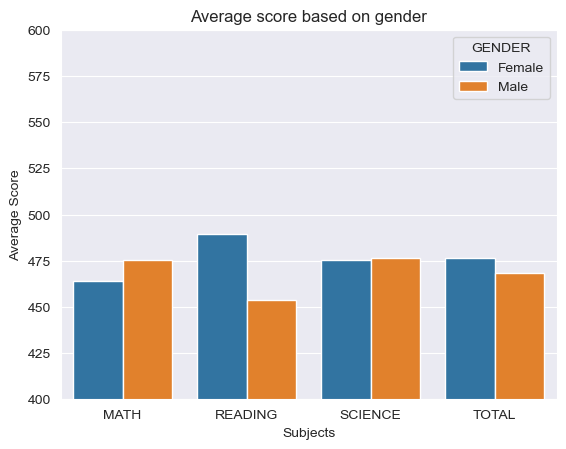

In [142]:
sns.barplot(data=df_pisa_gender_melt, x="variable",y="value",hue="GENDER")
plt.title('Average score based on gender')
plt.xlabel('Subjects')
plt.ylabel('Average Score')
plt.ylim(400, 600);

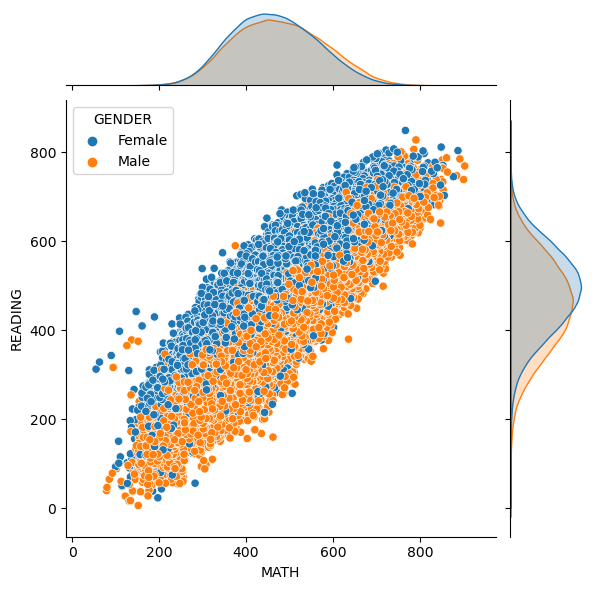

In [56]:
sns.jointplot(x='MATH', y='READING', data=df_pisa_clean, hue = 'GENDER')

> **Observation**: It seems that male students are performing better in Maths than female. It also seems that female students are performing better in reading than male students. Both categories are almost performing equally in science. Overall female are slightly better than male students. 

> **QUESTION**: Considering family wealth, how the gender looks in different categories?

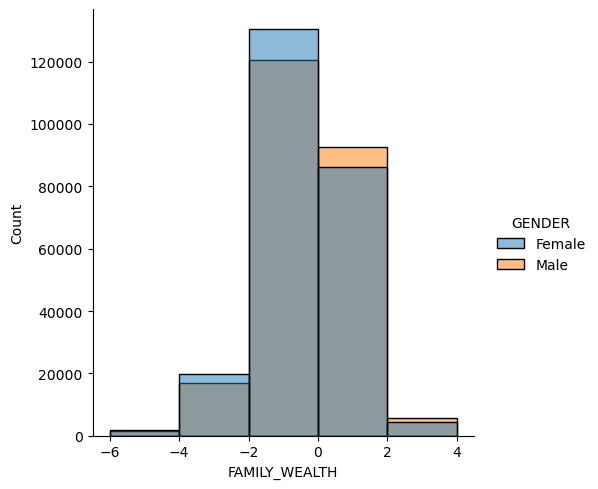

In [57]:
sns.displot(data=df_pisa_clean, x="FAMILY_WEALTH", hue="GENDER", bins=[-6, -4, -2, 0, 2, 4])

([<matplotlib.axis.XTick at 0x1cbed142c70>,
 [Text(0, 0, 'Very Poor'),
  Text(1, 0, 'Poor'),
  Text(2, 0, 'MiddClass'),
  Text(3, 0, 'Upper MiddClass'),
  Text(4, 0, 'Rich')])

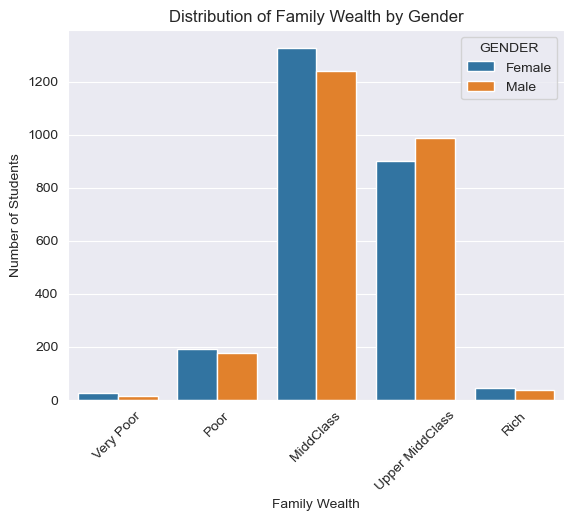

In [157]:
data09 = df_pisa_clean.sample(5000)
data09['FAMILY_WEALTH'] = pd.cut(data09['FAMILY_WEALTH'], bins=[-6, -4, -2, 0, 2, 4])
sns.countplot(x='FAMILY_WEALTH',  hue='GENDER', data=data09)

plt.xlabel('Family Wealth')
plt.ylabel('Number of Students')
plt.title('Distribution of Family Wealth by Gender')
plt.xticks(rotation = 45)
plt.xticks(ticks = [0,1,2,3,4], labels= ['Very Poor','Poor','MiddClass','Upper MiddClass','Rich'])


> **Observation**: It seems that more female students are under category 0 from family wealth point of view male students are more in wealthier categories. 

> **QUESTION**: Considering use of ICT at home, how the gender looks in different categories?

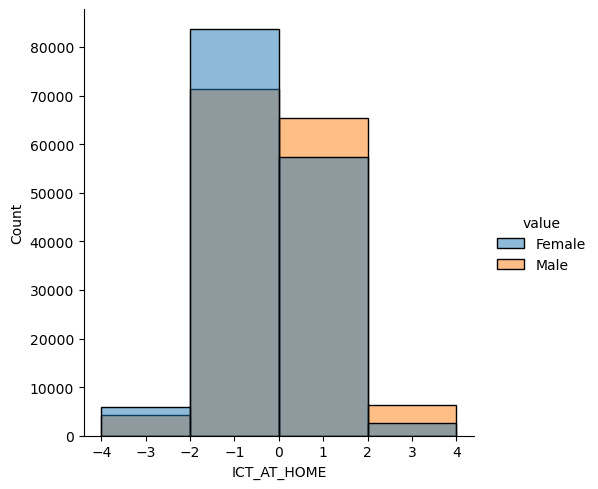

In [59]:
data1= df_pisa_clean
data1 = pd.melt(data1, id_vars=["ICT_AT_HOME"], value_vars=["GENDER"])
sns.displot(data=data1, x="ICT_AT_HOME", hue="value", bins = [-4, -2, 0, 2, 4])


> **Observation**: It seems that more male students are using ICT at home than female students. 

> **QUESTION**: How is the immigration structure looks like considering the gender of students?

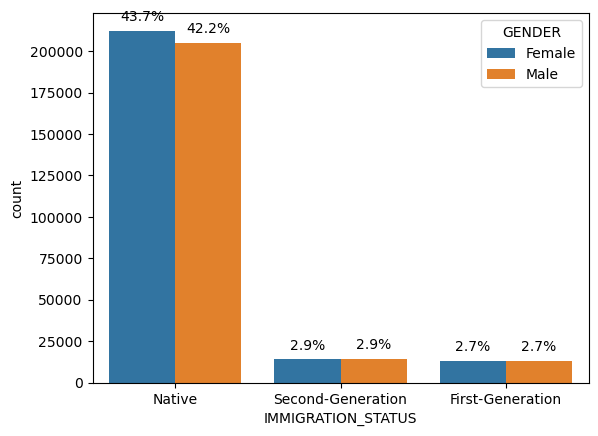

In [60]:
ax = sns.countplot(x=df_pisa_clean.IMMIGRATION_STATUS, hue = 'GENDER',data=df_pisa_clean)
total = float(len(df_pisa_clean))
for i in range(len(df_pisa_clean.IMMIGRATION_STATUS.value_counts())):
    for j in range(2):
        bar = ax.containers[j].patches[i]
        height = bar.get_height()
        ax.annotate("{:.1f}%".format(height/total*100), (bar.get_x() + bar.get_width() / 2, height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


> **Observation**: It seems that there are slightly more female native students than male students.

> **QUESTION:** How students are categorized based on the education level their parents while considering the gender of students?

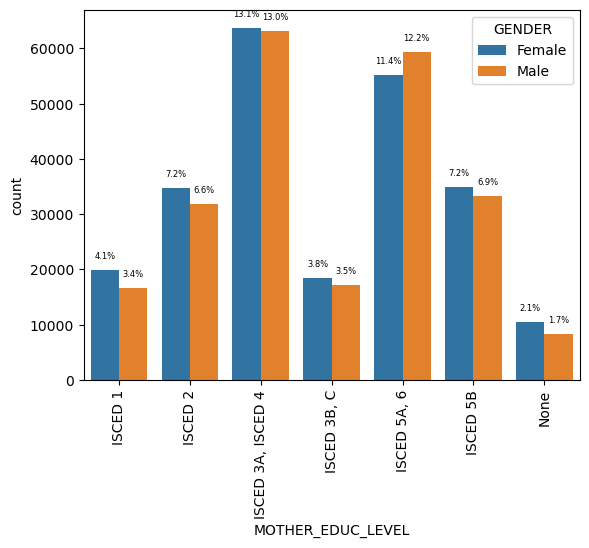

In [61]:
data2 = df_pisa_clean.sort_values(by='MOTHER_EDUC_LEVEL', ascending=True)
ax = sns.countplot(x=data2.MOTHER_EDUC_LEVEL, hue = 'GENDER',data=data2)
plt.xticks(rotation=90)
total = float(len(data2))
for i in range(len(data2.MOTHER_EDUC_LEVEL.value_counts())):
    for j in range(2):
        bar = ax.containers[j].patches[i]
        height = bar.get_height()
        ax.annotate("{:.1f}%".format(height/total*100), (bar.get_x() + bar.get_width() / 2, height), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize = 6)


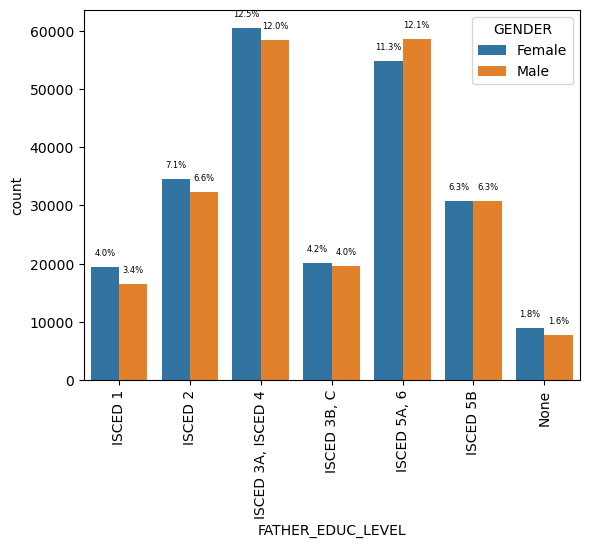

In [62]:
data3 = df_pisa_clean.sort_values(by='FATHER_EDUC_LEVEL', ascending=True)
ax = sns.countplot(x=data3.FATHER_EDUC_LEVEL, hue = 'GENDER',data=data3)
plt.xticks(rotation=90)
total = float(len(data3))
for i in range(len(data3.FATHER_EDUC_LEVEL.value_counts())):
    for j in range(2):
        bar = ax.containers[j].patches[i]
        height = bar.get_height()
        ax.annotate("{:.1f}%".format(height/total*100), (bar.get_x() + bar.get_width() / 2, height), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize = 6)


> **Observation**: It seems that female students are slightly higher in number than male students where their parents dont have any education. Similarly, majority of students where their parents are having the highest level of education are male. 

> **QUESTION:** Considering top and bottom 10 countries, how the gender looks among the students?

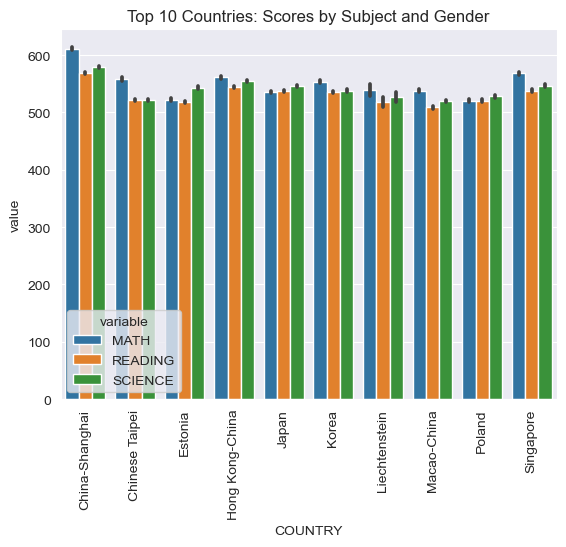

In [179]:
data = df_pisa_clean

# Calculate the average scores for each country
country_scores = data.groupby('COUNTRY')['MATH', 'READING', 'SCIENCE', 'TOTAL'].mean()

# Select the top and bottom 10 countries
top_10_countries = country_scores.nlargest(10, 'TOTAL').index
bottom_10_countries = country_scores.nsmallest(10, 'TOTAL').index

# Filter the data
top_countries = data[data['COUNTRY'].isin(top_10_countries)].groupby(['COUNTRY','GENDER'])['MATH', 'READING', 'SCIENCE', 'TOTAL'].mean().reset_index()
bottom_countries = data[data['COUNTRY'].isin(bottom_10_countries)].groupby(['COUNTRY','GENDER'])['MATH', 'READING', 'SCIENCE', 'TOTAL'].mean().reset_index()

# Sort the data
top_countries = top_countries.sort_values(by='TOTAL', ascending=False)
bottom_countries = bottom_countries.sort_values(by='TOTAL', ascending=True)

# Create a bar chart of the average scores for the top 10 countries
data_melt = data[data['COUNTRY'].isin(top_10_countries)].melt(id_vars=['COUNTRY', 'GENDER'], value_vars=['MATH', 'READING', 'SCIENCE'])
data_melt = data_melt.sort_values(by=['COUNTRY','value'],ascending=[True,False])
sns.barplot(x='COUNTRY', y='value', hue='variable', data=data_melt)
plt.title("Top 10 Countries: Scores by Subject and Gender")
plt.xticks(rotation=90)
plt.show()



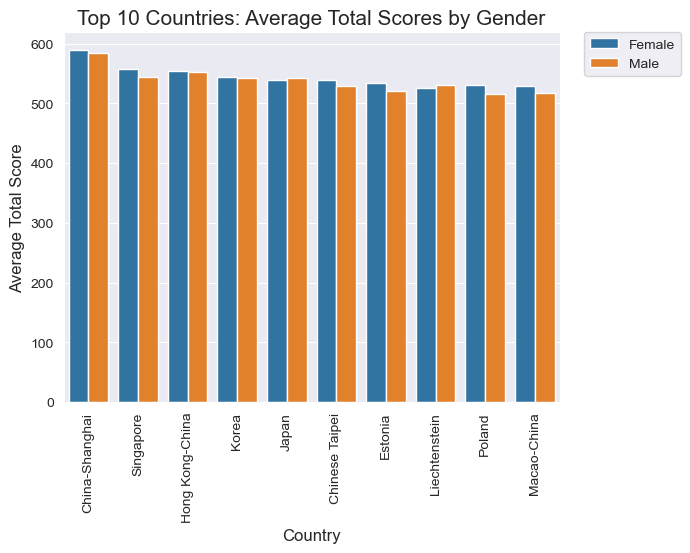

In [180]:
data = df_pisa_clean

# Calculate the average scores for each country
country_scores = data.groupby('COUNTRY')['MATH', 'READING', 'SCIENCE', 'TOTAL'].mean()

# Select the top and bottom 10 countries
top_10_countries = country_scores.nlargest(10, 'TOTAL').index
bottom_10_countries = country_scores.nsmallest(10, 'TOTAL').index

# Filter the data
top_countries = data[data['COUNTRY'].isin(top_10_countries)].groupby(['COUNTRY','GENDER'])['MATH', 'READING', 'SCIENCE', 'TOTAL'].mean().reset_index()
bottom_countries = data[data['COUNTRY'].isin(bottom_10_countries)].groupby(['COUNTRY','GENDER'])['MATH', 'READING', 'SCIENCE', 'TOTAL'].mean().reset_index()

# Sort the data
top_countries = top_countries.sort_values(by='TOTAL', ascending=False)
bottom_countries = bottom_countries.sort_values(by='TOTAL', ascending=True)
sns.barplot(x='COUNTRY', y='TOTAL', hue='GENDER', data=top_countries, ci = None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Top 10 Countries: Average Total Scores by Gender", fontsize = 15)
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Average Total Score", fontsize = 12)
plt.xticks(rotation=90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()


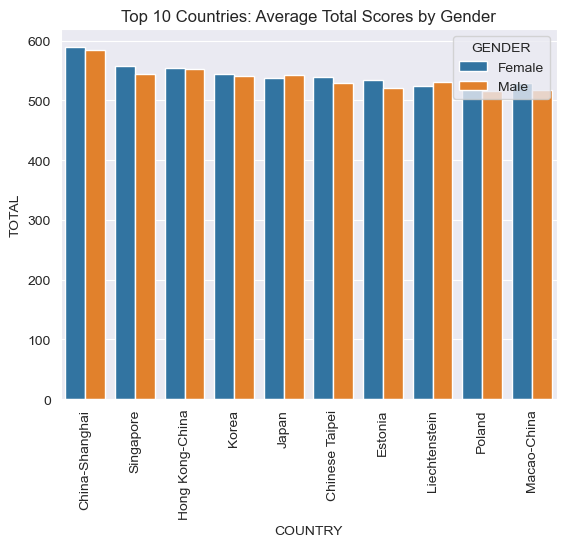

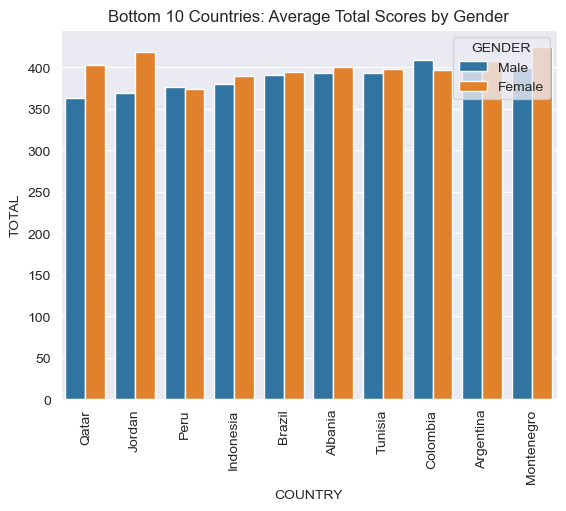

In [181]:
data = df_pisa_clean

# Calculate the average scores for each country
country_scores = data.groupby('COUNTRY')['MATH', 'READING', 'SCIENCE', 'TOTAL'].mean()

# Select the top and bottom 10 countries
top_10_countries = country_scores.nlargest(10, 'TOTAL').index
bottom_10_countries = country_scores.nsmallest(10, 'TOTAL').index

# Filter the data
top_countries = data[data['COUNTRY'].isin(top_10_countries)].groupby(['COUNTRY','GENDER'])['MATH', 'READING', 'SCIENCE', 'TOTAL'].mean().reset_index()
bottom_countries = data[data['COUNTRY'].isin(bottom_10_countries)].groupby(['COUNTRY','GENDER'])['MATH', 'READING', 'SCIENCE', 'TOTAL'].mean().reset_index()

# Sort the data
top_countries = top_countries.sort_values(by='TOTAL', ascending=False)
bottom_countries = bottom_countries.sort_values(by='TOTAL', ascending=True)

# Create a bar chart of the average scores for the top 10 countries
sns.barplot(x='COUNTRY', y='TOTAL', hue='GENDER', data=top_countries, ci = None)
plt.title("Top 10 Countries: Average Total Scores by Gender")
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='COUNTRY', y='TOTAL', hue='GENDER', data=bottom_countries, ci = None)
plt.title("Bottom 10 Countries: Average Total Scores by Gender")
plt.xticks(rotation=90)
plt.show()


> **Observation**: It seeems that in top 10 countries, female students are slightly outperform male students. But looking at bottom 10 countries, female students are similary outperform male students. 

> **QUESTION**: In top and bottom 10 countries, how the immigration status of the students looks like?

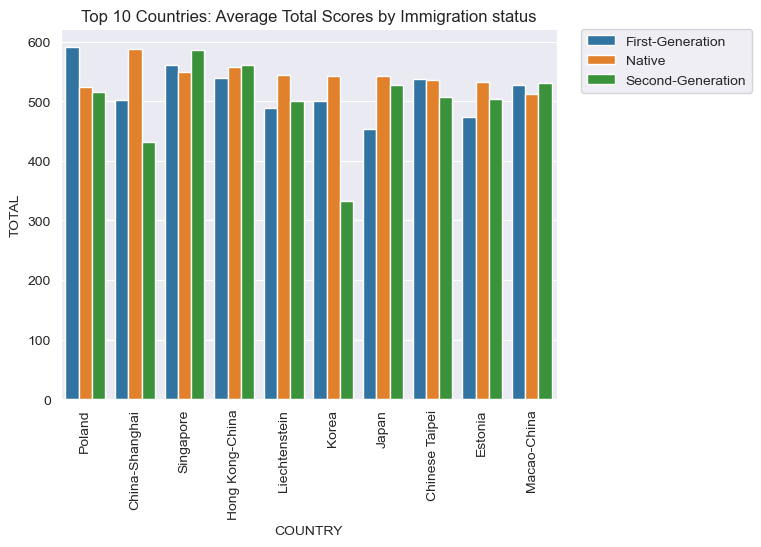

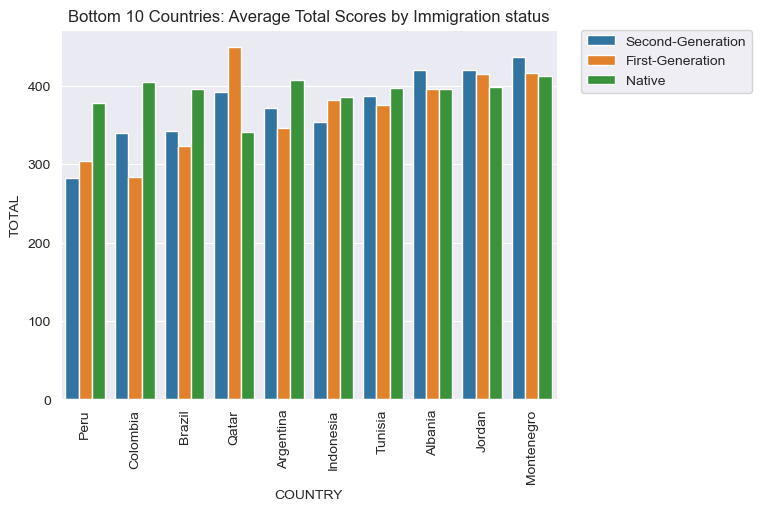

In [182]:
data02 = df_pisa_clean

# Calculate the average scores for each country
country_scores = data02.groupby('COUNTRY')['MATH', 'READING', 'SCIENCE', 'TOTAL'].mean()

# Select the top and bottom 10 countries
top_10_countries = country_scores.nlargest(10, 'TOTAL').index
bottom_10_countries = country_scores.nsmallest(10, 'TOTAL').index

# Filter the data
top_countries = data02[data02['COUNTRY'].isin(top_10_countries)].groupby(['COUNTRY','IMMIGRATION_STATUS'])['MATH', 'READING', 'SCIENCE', 'TOTAL'].mean().reset_index()
bottom_countries = data02[data02['COUNTRY'].isin(bottom_10_countries)].groupby(['COUNTRY','IMMIGRATION_STATUS'])['MATH', 'READING', 'SCIENCE', 'TOTAL'].mean().reset_index()

# Sort the data
top_countries = top_countries.sort_values(by='TOTAL', ascending=False)
bottom_countries = bottom_countries.sort_values(by='TOTAL', ascending=True)

# Create a bar chart of the average scores for the top 10 countries
sns.barplot(x='COUNTRY', y='TOTAL', hue='IMMIGRATION_STATUS', data=top_countries, ci = None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Top 10 Countries: Average Total Scores by Immigration status")
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='COUNTRY', y='TOTAL', hue='IMMIGRATION_STATUS', data=bottom_countries, ci = None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Bottom 10 Countries: Average Total Scores by Immigration status")
plt.xticks(rotation=90)
plt.show()



> **Observation**: It seems that among top 10 countries, only in 5 countries, majority of studnets are native students, while in other 5 remaining, majority of students are either 1st of 2nd generation immigrants. 

>  **QUESTION**: How the family wealth looks like while considering the immigration status of students?

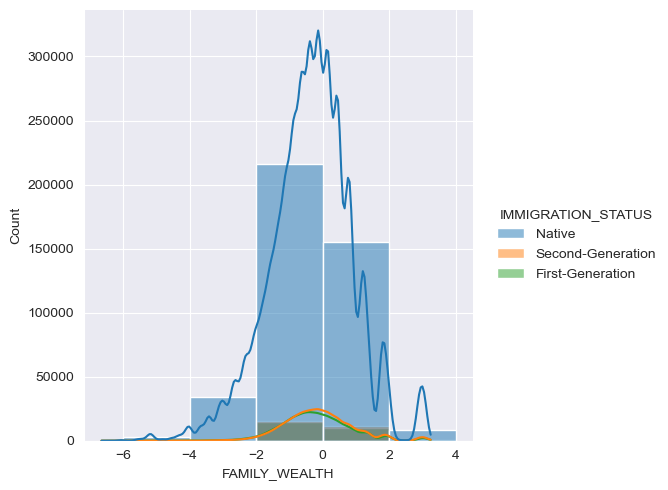

In [88]:
sns.displot(data=df_pisa_clean, x="FAMILY_WEALTH", hue="IMMIGRATION_STATUS", kde=True, bins=[-6, -4, -2, 0, 2, 4])


<AxesSubplot:xlabel='FAMILY_WEALTH', ylabel='count'>

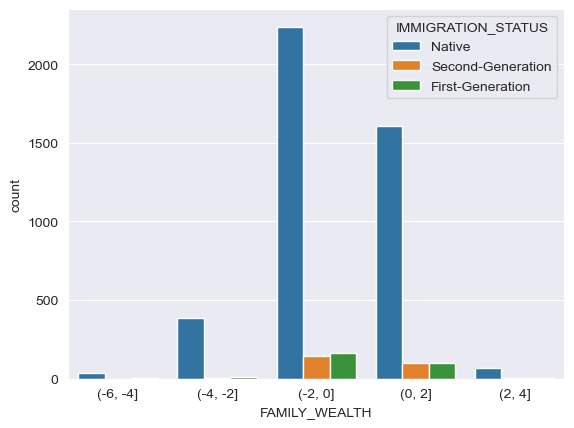

In [90]:
data09 = df_pisa_clean.sample(5000)
data09['FAMILY_WEALTH'] = pd.cut(data09['FAMILY_WEALTH'], bins=[-6, -4, -2, 0, 2, 4])
sns.countplot(x='FAMILY_WEALTH',  hue='IMMIGRATION_STATUS', data=data09)

([<matplotlib.axis.XTick at 0x1cbe0e66550>,
 [Text(0, 0, 'Very Poor'),
  Text(1, 0, 'Poor'),
  Text(2, 0, 'MiddClass'),
  Text(3, 0, 'Upper MiddClass'),
  Text(4, 0, 'Rich')])

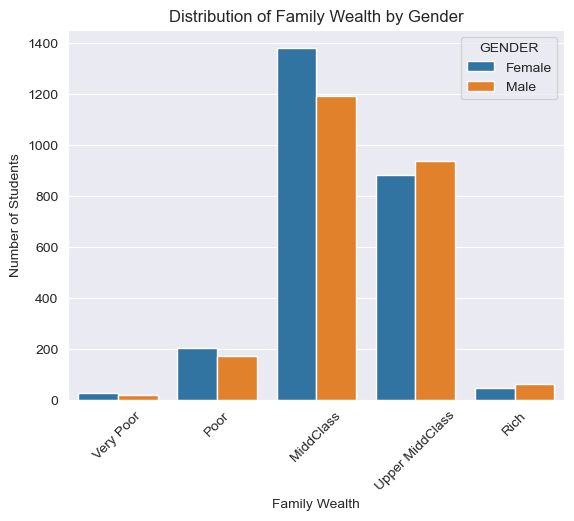

> **Observation**: Majority of second and first generation immigrant students are between -2 and 2 category from family wealth point of view. 

> **QUESTION**: How the family structure looks like accross different categories of family wealth?

<AxesSubplot:xlabel='FAMILY_WEALTH', ylabel='count'>

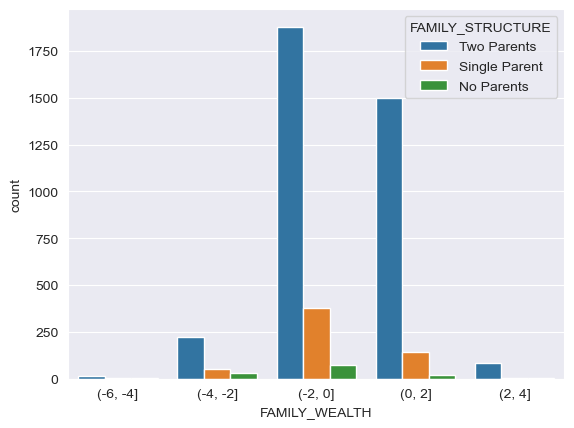

In [94]:
data10 = df_pisa_clean.sample(5000)
data10['FAMILY_WEALTH'] = pd.cut(data10['FAMILY_WEALTH'], bins=[-6, -4, -2, 0, 2, 4])
sns.countplot(x='FAMILY_WEALTH',  hue='FAMILY_STRUCTURE', data=data10)

> **Observation**: It seems that majority of student with single or no parents are between 0 and -2 category from family wealth point of view. Most wealthy students are only with two parents.

> **QUESTION**: How the cultural possessions at home looks like from gender point of view?

In [117]:
df_pisa_clean.query('CULTURAL_POSSESSIONS<0').GENDER.value_counts()

Male      119650
Female    107396
Name: GENDER, dtype: int64

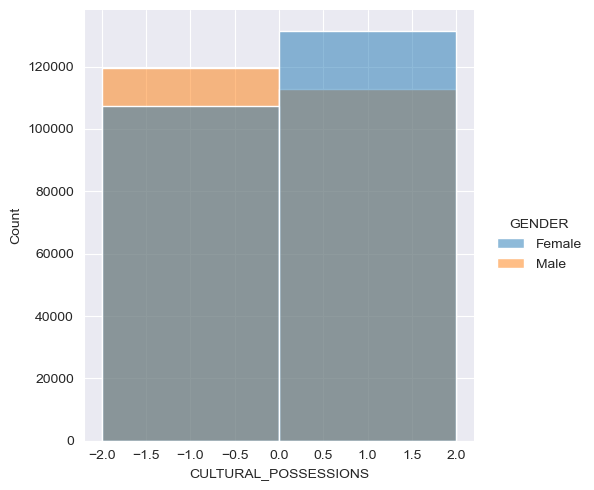

In [103]:
sns.displot(data=df_pisa_clean, x="CULTURAL_POSSESSIONS", hue="GENDER", bins=[-2, 0, 2])

> **Observation**: It seems that more female students are having cultural belongings at home in comparison to male students. 

> **QUESTION**: How students are performing well in all three subjects considering their immigration status?

In [133]:
df_pisa_immig = df_pisa_clean.groupby('IMMIGRATION_STATUS')[['MATH','READING','SCIENCE','TOTAL']].mean().reset_index()

In [131]:
df_pisa_immig_melt = pd.melt(df_pisa_immig, id_vars=['IMMIGRATION_STATUS'])

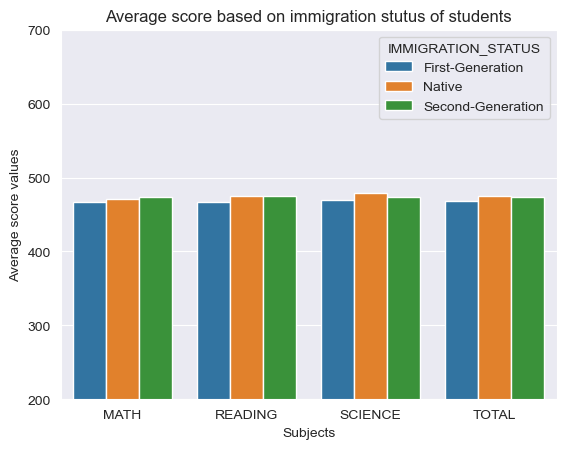

In [144]:
sns.barplot(data=df_pisa_immig_melt, x="variable",y="value",hue="IMMIGRATION_STATUS")
plt.ylim(200,700)
plt.xlabel('Subjects');
plt.ylabel('Average score values');
plt.title('Average score based on immigration stutus of students');

> **Observation:** It seesms that second generation immigrated students are performing better in Maths than any other two groups, while slightly equal to native students in reading. Native students are performing well in Science than any other two groups. First generation immigrated students are performing the least in all three subjects. 

### Interesting Observations:

> All assumptions during the univariate and bivariate assessment of data were strenghtened. 

### Surprising interactions:

> More male students are owning luxury items at home than female students while female students are owning more cultural items at home than male students. 

## Conclusions
>**1. It appears that there is no relationship between the use of ICT at home or the use of entertainment ICT at home and the academic performance of students in these subjects. Despite the notion that spending more time watching TV or using video games at home may negatively impact students' performance in school, our data suggests that any correlation between the two is minimal. However, it is still important to consider the impact of these activities on students' physical and mental health.**

>**2. It seems that male students consistently outperform female students in the subject of mathematics.
In contrast, female students typically outperform their male counterparts when it comes to reading.
Both student groups perform about equally well in the subject of science.
When all three subjects are considered, it seems that female students perform marginally better than male students.
This seems to show that while men and women are equally capable of understanding science, they may have different aptitudes for mathematics and reading.**

>**3. An intriguing discovery that can be made from analysing PISA data is the correlation between a student's immigration status and their academic performance. Research has revealed that, generally speaking, students from immigrant families tend to perform less well in mathematics, reading, and science than their native-born peers. However, a closer examination of the data reveals some nuances in this trend.
For instance, it has been found that second-generation immigrant students - those who are born in the host country to immigrant parents - tend to perform better in mathematics than both first-generation immigrant students and native-born students. In reading, their performance is slightly equivalent to that of native students, while in science, native students tend to perform better. On the other hand, first-generation immigrant students tend to perform the least in all three subjects, compared to native and second-generation immigrant students.
This information highlights the importance of considering the specific experiences and circumstances of immigrant students, rather than making broad generalisations about their performance. It also suggests that, over time, as immigrants and their children become more acculturated and integrated into their host societies, their academic performance tends to improve.**

>**4. An interesting finding that can be obtained from the data is the relationship between family wealth and student performance. For example, it is assumed that students from wealthy families tend to perform better than students from less wealthy families. While the data indicates that despite having a narrow positive correlation, this factor is not a key element for the success of students.
Moreover, this relationship can vary depending on gender; in some cases, it is found that boys tend to benefit more from their family's wealth than girls, and vice versa.**

>**5. An interesting finding that is obtained from PISA data is the relationship between cultural possessions and student performance. For example, data has shown that students who have access to more cultural possessions such as books, music, art or other cultural materials tend to perform better especially in Reading than students who have less access to these resources. It also showed that female student are more tend to have such cultural possessions at home than male students.**

>**6. Another key insight that can be gleaned from PISA data is the relationship between a student's country of residence and their academic performance. It has been observed that there is a correlation between where a student lives and how they fare in the areas of mathematics, reading, and science. Interestingly, it has been found that none of the major European economies are among the top-performing countries in PISA, while the top-10 list is primarily dominated by East Asian nations.
This information highlights the variations in educational systems and policies between different countries, and how these can impact student performance. It also suggests that certain regions of the world, such as East Asia, have been successful in implementing effective educational policies and practices that lead to high levels of student achievement. It is worth noting that this finding is not conclusive, as it depends on the year of the data and the PISA cycle.**

>**7. The PISA data suggests that a large proportion of mothers have completed either general or vocational upper/post-secondary education. In terms of fathers, it appears that the majority have similar levels of education as their mothers, with a slightly lower percentage of fathers having no education compared to mothers. This indicates a strong correlation between the education levels of each parent. Additionally, the data shows that mothers and fathers who have completed ISCED 5A,6 and ISCED 3A,4 education levels have the greatest impact on the success of students in mathematics, reading, and science.**
